## **Clustering and PCA research for the bank transactions dataset.**

**Background of the research**

Bank transactions are more than just exchanges of currency; they are very important sources of data that reflect complex customer behaviors and preferences. The analysis of transaction data is a very important tool for financial institutions, providing critical insights that drive strategic decision-making and customer service optimization.



**This study aims to address the following research objectives:**

-To identify patterns in bank transaction data that facilitate customer segmentation.

-To develop a predictive model that forecasts future customer transaction behaviors.

-To explore the utility of clustering methods in discerning distinct customer groups.

### **Research Question:**

**How can leveraging customer segmentation derived from demographics and transaction history enhance our ability to model and predict future behaviors, thereby enabling the delivery of tailored and personalized banking services to our clients?**

In this Jupyter Notebook, the bank transactions dataset will be used to implement the following ML models. The EDA will be used to get a better understanding of the dataset. Principal Component Analysis (PCA) will be used to reduce the dimensionality of the data. 
Then, using the K-means algorithm, a clustering model will be built to group the data according to certain properties. 
The clusters will be intreperated and the research question will be answered with them. 
Finally, DBSCAN/HDBSCAN will be performed to see which model performs better on the dataset and which is able to cluster the data better.


 ## **Sub-Questions**

 ### **Demographic Influence on Transaction Behavior:**
        - How do demographic factors like age (derived from CustomerDOB) and gender (CustGender) influence transaction behaviors (frequency, amount)?

 ### **Geographical Impact on Spending Patterns:**
        - Does the customer’s location (CustLocation) impact their spending patterns?

 ### **Account Balance Correlation:**
        - How does the customer’s account balance (CustAccountBalance) correlate with their transaction habits, and can this predict future transaction behaviors?

 ### **Temporal Transaction Trends:**
        - Are there discernible patterns in transaction behaviors based on TransactionDate and TransactionTime (e.g., more activity during certain months, days of the week, or times of the day)?

### **Personalization of Banking Services:**
        - Based on the identified segments and predicted behaviors, what personalized banking services can be offered to different customer groups?

# Table of contents 

### - 1. Import libraries 
### - 2. Dataset preparation
        - 2.1 Import dataset 
        - 2.2 Detection of NaN values and imputation
        - 2.3 Detection of outliers and removal 
        - 2.4 One-hot encoding on categorical features
 ### - 3. EDA 
        - 3.1 Basic visuals 
        - 3.2 Distribution 
        - 3.3 Distribution 
### - 4. Clustering 
        - 4.1 Dimensionality reduction with PCA method. 
        - 4.2 K-Means clustering. 
        - 4.3 Elbow method.
        - 4.4 Model evaluation

### - 5. Model interpretation 
        - 5.1 Interpretation of the clusters 
        - 5.2 Answer on the research question

### - 6. DBSCAN/HDBSCAN 
        - 6.1 Performing DBSCAN
        - 6.2 Performing HDBSCAN 
        - 6.3 Comparing K-means clustering and DBSCAN/HDBSCAN 

# 1. Import libraries 

In [554]:
# Import basic libraries
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# 2. Dataset preparation 

### 2.1 Import the dataset

In [555]:
# Read the bank_transactions dataset
bank_transactions_df = pd.read_csv("/Users/hiddebrink/Desktop/bank_transactions.csv")
print('Original length of dataframe:', len(bank_transactions_df))
bank_transactions_df.head()

Original length of dataframe: 1048567


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [556]:
print(bank_transactions_df.columns)


Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')


### The following features are visible in the bank_transactions dataset:

- **Transaction ID:** A unique number for a single transaction made by a customer. 

- **Customer ID:** The unique number of the customer who carried out the specific transaction. A customer may have multiple transactions. This will be confirmed or rejected   later. 

- **Customer DOB:** Customer's date of birth. Listed in the order Day/Month/Year. 

- **CustGender:** Customer's gender noted as F for female and M for male. 

- **CustLocation:** The location from where the transaction was executed. These are cities in India. 

- **CustAccountBalance:** The balance of the customer's bank account before execution of the transaction. 

- **TransactionDate:** The day on which the transaction was executed listed in Day/Month/Year. 

- **TransactionTime:** What time the transaction is executed on the day expressed in Hour/Minute/Seconds. For example: 144415 means 14.44 and 15 seconds. 

- **TransactionAmount (INR):** The amount of money expressed in Indian rupees withdrawn in the transaction. 

In [557]:
# Display some basic info about the features in the dataset
bank_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


### 2.2 Detection of NaN values and imputation

In [558]:
# Checking Nans and if required removing them
print('Printing total number of NaNs in the dataframe,', bank_transactions_df.isnull().sum().sum())

Printing total number of NaNs in the dataframe, 7017


This means that there are many NaN values in the dataset. Let's see in which columns the most NaN values are located. 

In [559]:
# Count the number of NaN values per column
nan_count_per_column = bank_transactions_df.isna().sum()

# Display the result
print("Number of NaN values per column:")
print(nan_count_per_column)

Number of NaN values per column:
TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


### We can see that the NaN values are located in the following columns (features): 

- **CustomerDOB: 3397**
- **CustGender: 1100**
- **CustLocation: 151**
- **CustAccountBalance: 2369**

In [560]:
# Filling missing values in 'CustomerDOB' with the mode (most frequent date) since it is a date not a number
bank_transactions_df['CustomerDOB'].fillna(bank_transactions_df['CustomerDOB'].mode()[0], inplace=True)

In [561]:
# Filling missing values in 'CustGender' with the mode (most frequent gender) since it is a categorical data
bank_transactions_df['CustGender'].fillna(bank_transactions_df['CustGender'].mode()[0], inplace=True)

In [562]:
# Filling missing values in 'CustLocation' with the mode (most frequent location)
bank_transactions_df['CustLocation'].fillna(bank_transactions_df['CustLocation'].mode()[0], inplace=True)

The missing values for the features 'CustomerDOB', 'CustGender' and 'CustLocation' were filled in using mode. 

In [563]:
import pandas as pd
from sklearn.impute import KNNImputer

# Extract the column you want to impute
column_to_impute = 'CustAccountBalance'
column_data = bank_transactions_df[[column_to_impute]]

# Instantiate the KNNImputer
knn_imputer = KNNImputer(n_neighbors=2)

# Impute NaN values using KNN for the selected column
column_imputed = pd.DataFrame(knn_imputer.fit_transform(column_data), columns=[column_to_impute])

# Replace the original column with the imputed values
bank_transactions_df[column_to_impute] = column_imputed[column_to_impute]

# Display the DataFrame after imputation
print("DataFrame after imputation:")
print(bank_transactions_df)

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


The CustAccountBalance feature underwent imputation for missing values using the KNN (K-Nearest Neighbors) method. This involved calculating the nearest neighbors, and based on the characteristics of these similar values, the missing entries were imputed. Specifically, a parameter setting of 2 neighbors was chosen for the imputation process.

In [564]:
# Count the number of NaN values per column
nan_count_per_column = bank_transactions_df.isna().sum()

# Display the result
print("Number of NaN values per column:")
print(nan_count_per_column)


Number of NaN values per column:
TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64


A double-check to see if any missing values can be found in the CustAccountBalance column. It appears that the KNN method has done its job well. 

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

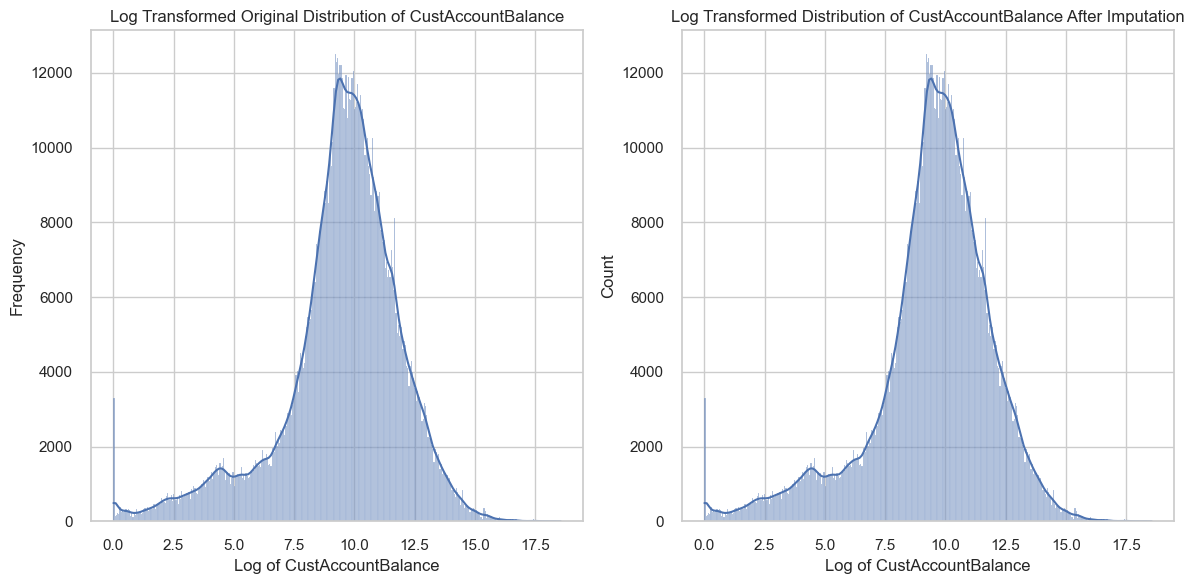

In [565]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Original data (before imputation)
original_data = bank_transactions_df['CustAccountBalance'].dropna()

# Data after imputation
imputed_data = bank_transactions_df['CustAccountBalance']

# Calculate the log of the CustAccountBalance to transform the data
# Adding a small constant to avoid issues with log(0)
log_original_data = np.log1p(original_data)
log_imputed_data = np.log1p(imputed_data)

# Setting up the plot
plt.figure(figsize=(12, 6))

# Plotting the original distribution (before imputation) in log scale
plt.subplot(1, 2, 1)
sns.histplot(log_original_data, kde=True)
plt.title('Log Transformed Original Distribution of CustAccountBalance')
plt.xlabel('Log of CustAccountBalance')
plt.ylabel('Frequency')

# Plotting the distribution after imputation in log scale
plt.subplot(1, 2, 2)
sns.histplot(log_imputed_data, kde=True)
plt.title('Log Transformed Distribution of CustAccountBalance After Imputation')
plt.xlabel('Log of CustAccountBalance')

plt.tight_layout()
plt.show()

/var/folders/0j/7cx806gn37z1r7293__z9f_00000gn/T/ipykernel_13583/1459570745.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_transactions_df['CustomerDOB'] = pd.to_datetime(bank_transactions_df['CustomerDOB'], errors='coerce')
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hiddebrink/anaconda3/envs/AI_methods

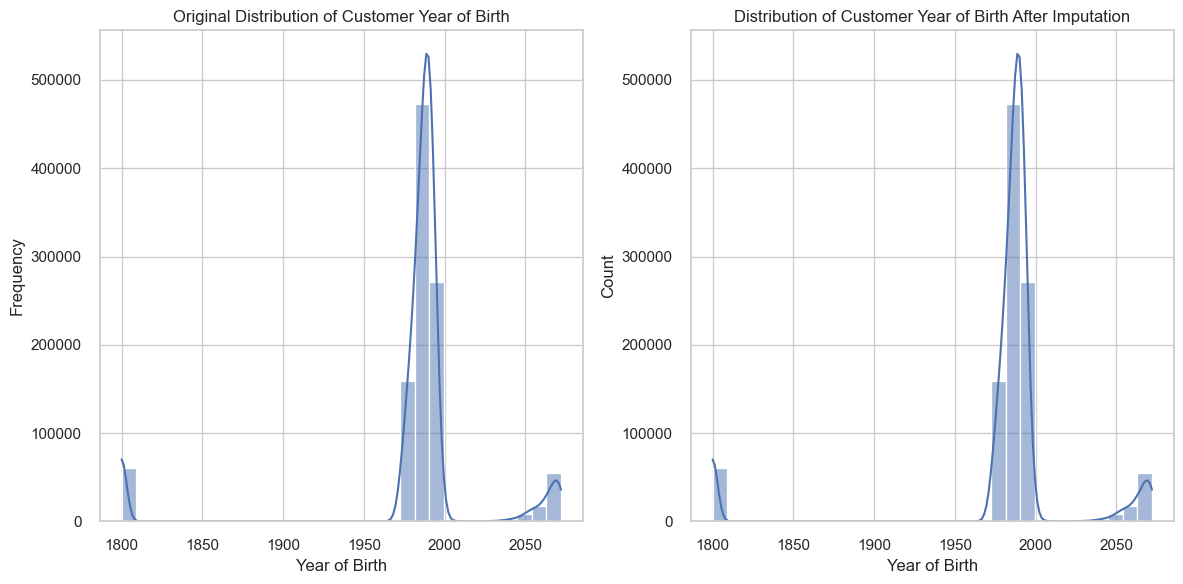

In [566]:
# Convert 'CustomerDOB' to datetime
bank_transactions_df['CustomerDOB'] = pd.to_datetime(bank_transactions_df['CustomerDOB'], errors='coerce')

# Original data (before imputation)
original_dob_data = bank_transactions_df['CustomerDOB'].dropna()

# Impute missing values in 'CustomerDOB' with the mode (most frequent date)
bank_transactions_df['CustomerDOB'].fillna(bank_transactions_df['CustomerDOB'].mode()[0], inplace=True)

# Data after imputation
imputed_dob_data = bank_transactions_df['CustomerDOB']

# Extract year from 'CustomerDOB'
original_dob_data_year = original_dob_data.dt.year
imputed_dob_data_year = imputed_dob_data.dt.year

# Setting up the plot
plt.figure(figsize=(12, 6))

# Plotting the original distribution (before imputation)
plt.subplot(1, 2, 1)
sns.histplot(original_dob_data_year, bins=30, kde=True)
plt.title('Original Distribution of Customer Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')

# Plotting the distribution after imputation
plt.subplot(1, 2, 2)
sns.histplot(imputed_dob_data_year, bins=30, kde=True)
plt.title('Distribution of Customer Year of Birth After Imputation')
plt.xlabel('Year of Birth')

plt.tight_layout()
plt.show()

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

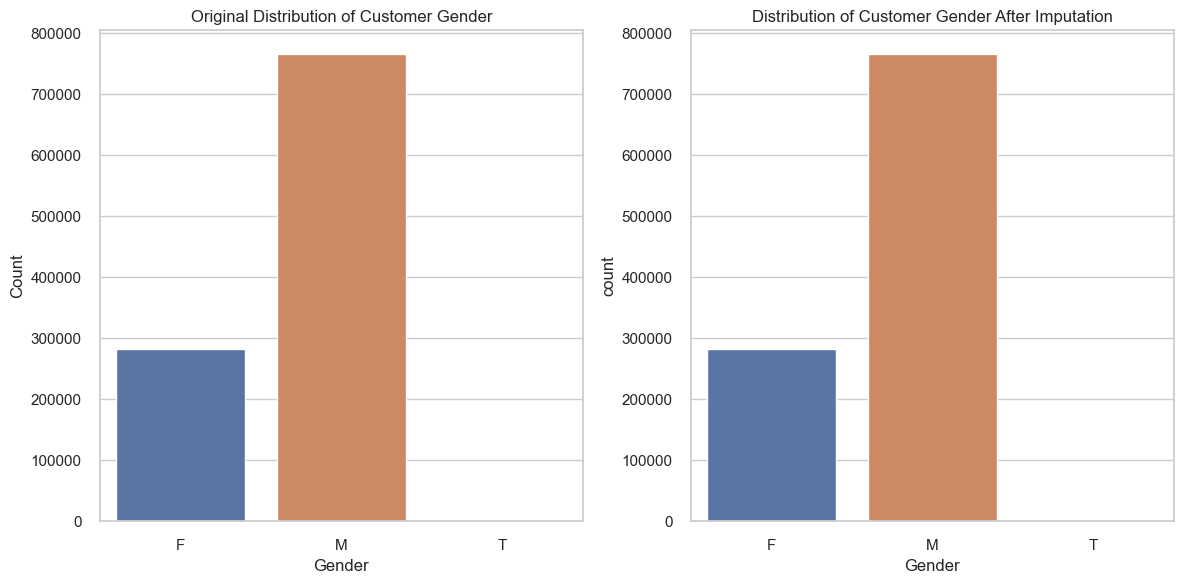

In [567]:
# Original data (before imputation)
original_gender_data = bank_transactions_df['CustGender'].dropna()

# Impute missing values in 'CustGender' with the mode (most frequent gender)
bank_transactions_df['CustGender'].fillna(bank_transactions_df['CustGender'].mode()[0], inplace=True)

# Data after imputation
imputed_gender_data = bank_transactions_df['CustGender']

# Setting up the plot
plt.figure(figsize=(12, 6))

# Plotting the original distribution (before imputation)
plt.subplot(1, 2, 1)
sns.countplot(x=original_gender_data)
plt.title('Original Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plotting the distribution after imputation
plt.subplot(1, 2, 2)
sns.countplot(x=imputed_gender_data)
plt.title('Distribution of Customer Gender After Imputation')
plt.xlabel('Gender')

plt.tight_layout()
plt.show()

### 2.3 Detection of outliers and removal 

*After filling in the NaN values, we visualize each feature so that we gett a better understanding of the distribution and characteristics of the data.*

In [568]:
# The theme colours of the plots is set on white
sns.set_theme(style='whitegrid')

*First feature - Customer Account Balance* 

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


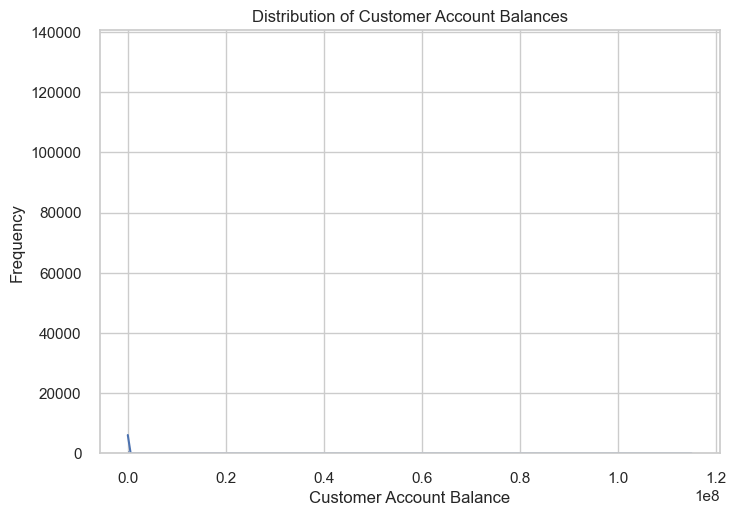

In [569]:
# For the 'CustAccountBalance' feature
sns.histplot(data=bank_transactions_df, x='CustAccountBalance', kde=True)
plt.title('Distribution of Customer Account Balances')
plt.xlabel('Customer Account Balance')
plt.ylabel('Frequency')
plt.show()


Most of the customer account balances are clustered around a lower value, and there are very few accounts with high balances, as indicated by the bars on the far left and the empty space to the right.

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


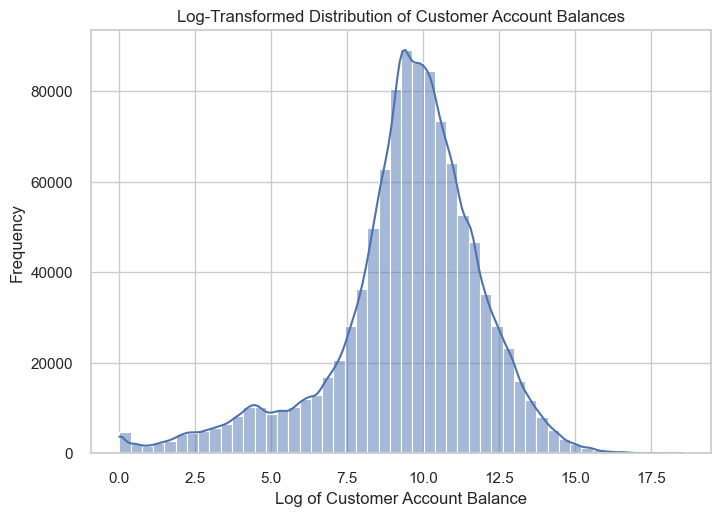

In [570]:
# Apply a log transformation to the 'CustAccountBalance' column
# Adding a small constant to avoid log(0)
log_balances = np.log1p(bank_transactions_df['CustAccountBalance'])

# Plot the log-transformed data
sns.histplot(log_balances, bins=50, kde=True)
plt.title('Log-Transformed Distribution of Customer Account Balances')
plt.xlabel('Log of Customer Account Balance')
plt.ylabel('Frequency')
plt.show()

*Second feature - Transaction Date* 

/var/folders/0j/7cx806gn37z1r7293__z9f_00000gn/T/ipykernel_13583/605933557.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_transactions_df['TransactionDate'] = pd.to_datetime(bank_transactions_df['TransactionDate'])


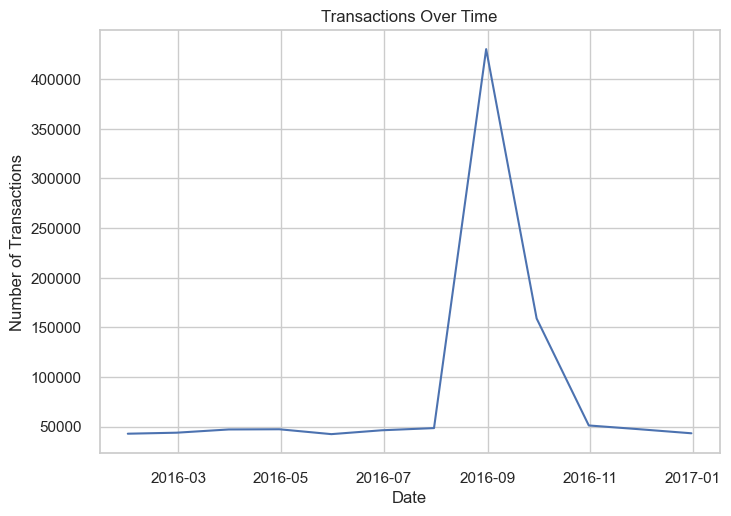

In [571]:
# Time Series Plot of Transactions Over Time
bank_transactions_df['TransactionDate'] = pd.to_datetime(bank_transactions_df['TransactionDate'])
transactions_over_time = bank_transactions_df.set_index('TransactionDate').resample('M')['TransactionID'].count()
plt.plot(transactions_over_time)
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

*Third feature -Customer Location*  

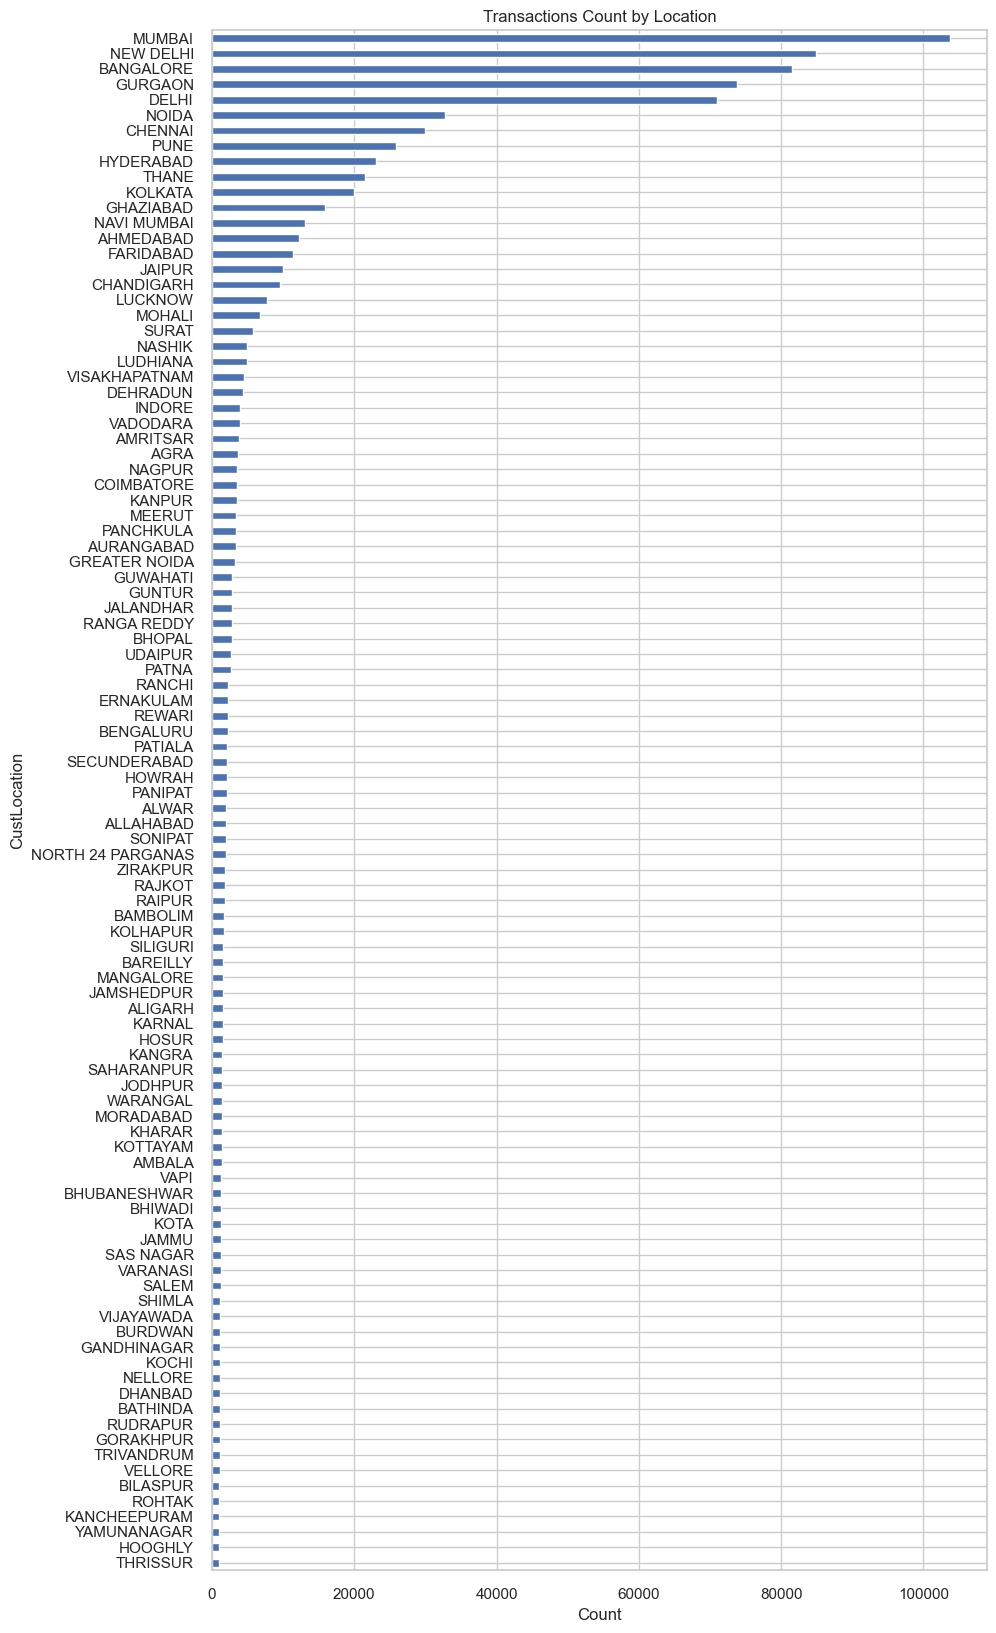

In [572]:
# First, calculate the transactions count by location
location_counts = bank_transactions_df['CustLocation'].value_counts()

# Then, create a horizontal bar chart
plt.figure(figsize=(10, 20))  # You may need to adjust the size
location_counts.head(100).plot(kind='barh')  # Adjust the number of locations you want to display
plt.gca().invert_yaxis()  # This will display the highest count at the top
plt.xlabel('Count')
plt.title('Transactions Count by Location')
plt.show()

In [573]:
# Identify the top 100 cities based on the count of transactions
top_cities_count = 100
top_cities_by_count = bank_transactions_df['CustLocation'].value_counts().nlargest(top_cities_count).index

# Calculate the total transaction count for all cities
total_count_all_cities = len(bank_transactions_df)

# Calculate the total transaction count for the top 100 cities
total_count_top_cities = bank_transactions_df[bank_transactions_df['CustLocation'].isin(top_cities_by_count)].shape[0]

# Calculate the percentage
percentage_covered = (total_count_top_cities / total_count_all_cities) * 100

# Display the result
print(f"Percentage of transactions covered by the top 100 cities (by count): {percentage_covered:.2f}%")


Percentage of transactions covered by the top 100 cities (by count): 78.53%


So, if we take the top 100 cities out of the CustLocation column filtered on the number of transactions, almost 79% of the data is covered. 

*Fourth feature -Customer Gender*  

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


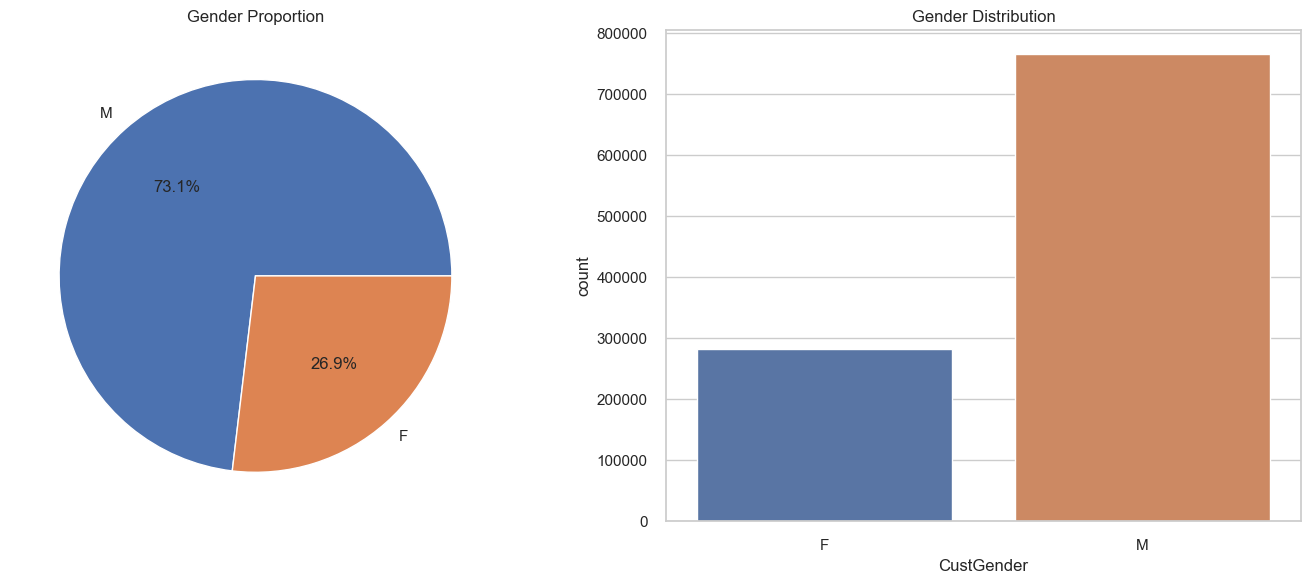

In [574]:
# Drop rows with 'T' in the 'CustGender' column because there's only one T value in the dataset
bank_transactions_df = bank_transactions_df[bank_transactions_df['CustGender'] != 'T']

# Setting up the plot area
plt.figure(figsize=(14, 6))

# Plotting the pie chart for gender proportion
plt.subplot(1, 2, 1)
bank_transactions_df['CustGender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Proportion')
plt.ylabel('')

# Plotting the count plot for gender distribution
plt.subplot(1, 2, 2)
sns.countplot(x='CustGender', data=bank_transactions_df)
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()


*Fifth feature -Customer Date of Birth*  

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


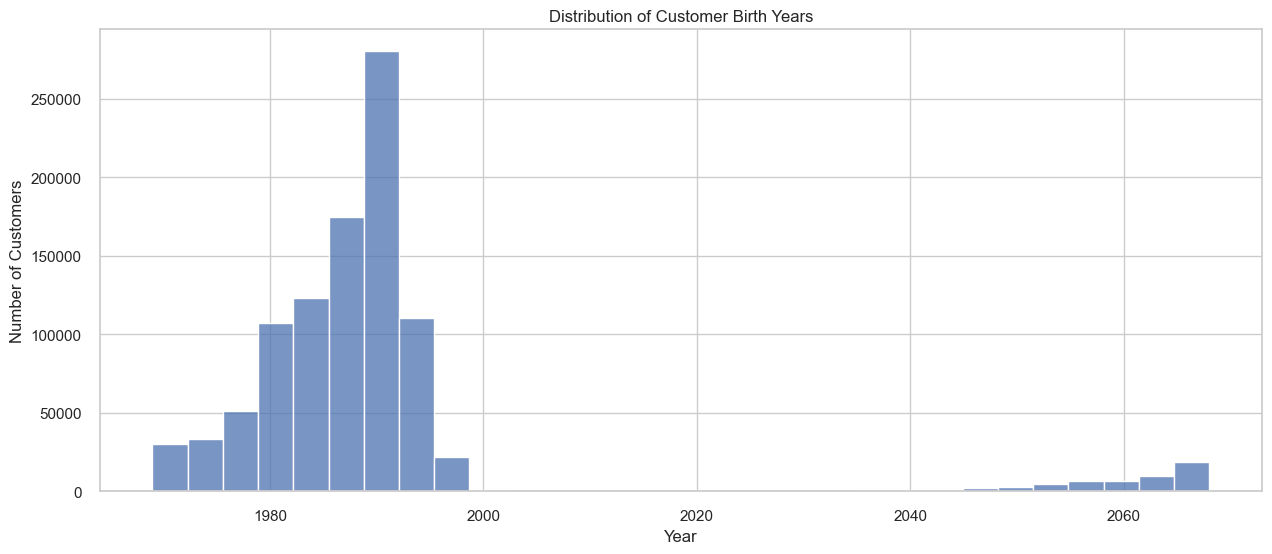

In [575]:
# Define the path to your CSV file
file_path = "/Users/hiddebrink/Desktop/bank_transactions.csv"

# Initialize an empty list to hold the 'Year' data
years_list = []

# Define the chunk size
chunk_size = 50000  # Adjust the chunk size based on your system's memory

# Read the CSV file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Convert 'CustomerDOB' to datetime format
    chunk['CustomerDOB'] = pd.to_datetime(chunk['CustomerDOB'], format='%d/%m/%y', errors='coerce')

    # Extract the year from 'CustomerDOB'
    chunk['Year'] = chunk['CustomerDOB'].dt.year

    # Append the year data to the list, filtering out any NaN values
    years_list.extend(chunk['Year'].dropna())

# Convert the list to a DataFrame for plotting
years_df = pd.DataFrame(years_list, columns=['Year'])

# Plotting the distribution of 'Year'
plt.figure(figsize=(15, 6))
sns.histplot(years_df['Year'], bins=30, kde=False)
plt.title('Distribution of Customer Birth Years')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()

In the graph above we can see some weird numbers for Customer Date of Birth. For example Customers who are born in the future. Later we'll remove these features and filter only on realistic numbers for Customer Date of Birth. 

*Sixth feature -Transaction Time*  

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


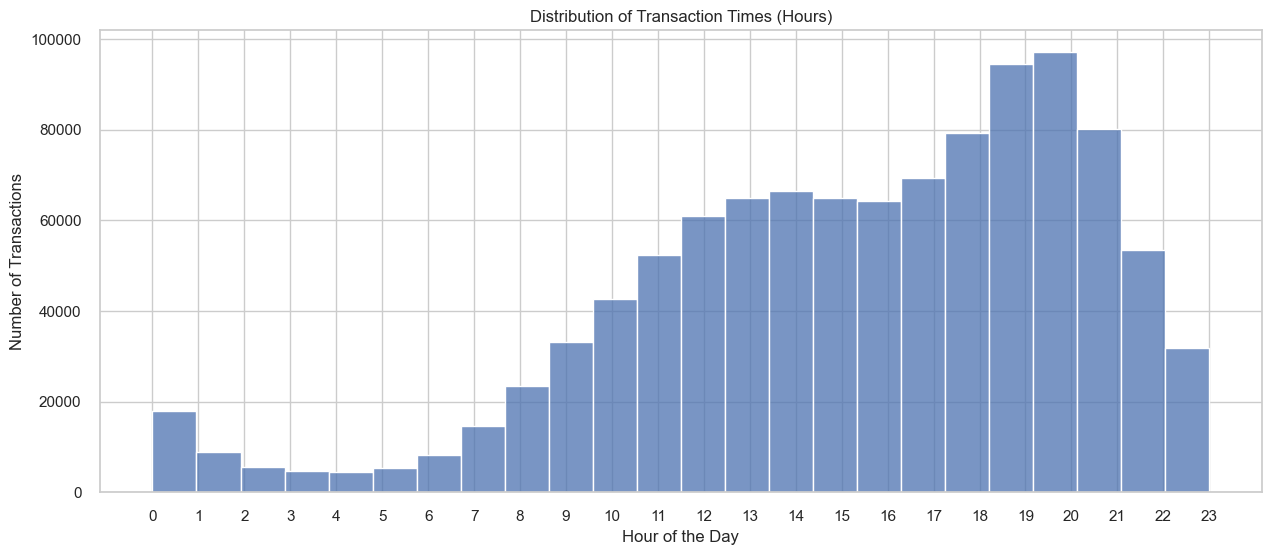

In [576]:
# Define the path to your CSV file
file_path = "/Users/hiddebrink/Desktop/bank_transactions.csv"

# Initialize a list to store the hours of transactions
transaction_hours = []

# Define the chunk size
chunk_size = 50000

# Read the CSV file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Convert 'TransactionTime' to a string and pad with zeros to ensure it's in HHMMSS format
    chunk['TransactionTime'] = chunk['TransactionTime'].astype(str).str.zfill(6)

    # Extract the hour part and convert to integer
    chunk['Hour'] = chunk['TransactionTime'].str.slice(0, 2).astype(int)

    # Append the hour data to the list
    transaction_hours.extend(chunk['Hour'])

# Convert the list to a DataFrame for plotting
transaction_hours_df = pd.DataFrame(transaction_hours, columns=['Hour'])

# Plotting the distribution of transaction hours
plt.figure(figsize=(15, 6))
sns.histplot(transaction_hours_df['Hour'], bins=24, kde=False)
plt.title('Distribution of Transaction Times (Hours)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.show()

*Seventh feature -Transaction Amount (INR)*  

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


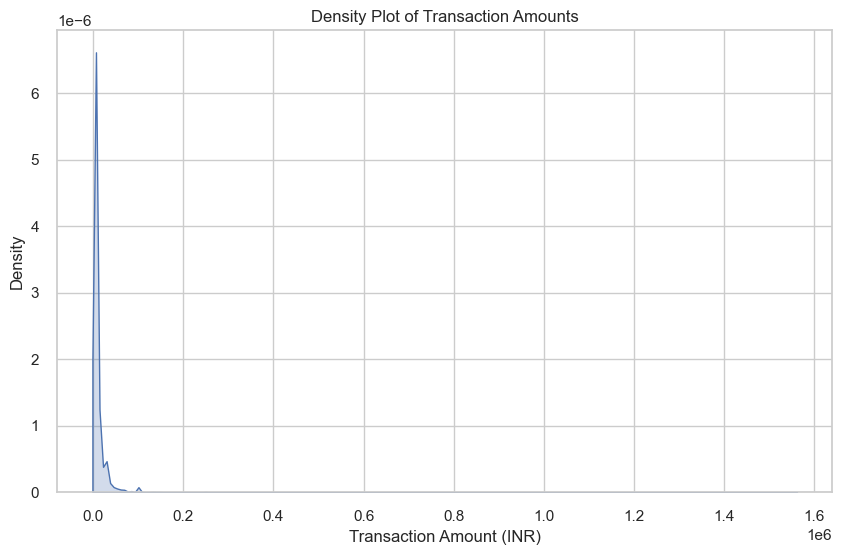

In [577]:
transaction_amounts_df = bank_transactions_df[['TransactionAmount (INR)']].copy()
plt.figure(figsize=(10, 6))
sns.kdeplot(bank_transactions_df['TransactionAmount (INR)'], fill=True)
plt.title('Density Plot of Transaction Amounts')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Density')
plt.show()


*Now it is important to understand from the CustomerID if there is any difference between the customer ID and number of transactions. This way we can analyze number of transactions per customer ID.*

In [578]:
import pandas as pd

# Assuming bank_transactions_df is your DataFrame with columns 'CustomerID' and 'TransactionID'

# Calculate the average number of transactions per customer
average_transactions_per_customer = bank_transactions_df.groupby('CustomerID')['TransactionID'].count().mean()

# Find the customer with the most transactions and the count
customer_most_transactions = bank_transactions_df['CustomerID'].value_counts().idxmax()
most_transactions_count = bank_transactions_df['CustomerID'].value_counts().max()

# Count the number of unique CustomerID values
num_unique_customers = bank_transactions_df['CustomerID'].nunique()

# Get the total number of rows in the DataFrame
total_rows = bank_transactions_df.shape[0]

# Compare the counts
is_equal = num_unique_customers == total_rows

print("Number of unique CustomerIDs:", num_unique_customers)
print("Total number of rows in the DataFrame:", total_rows)
print("Is the count of unique CustomerIDs equal to the total number of rows?", is_equal)
print("Average number of transactions per customer:", average_transactions_per_customer)
print("Customer with the most transactions:", customer_most_transactions)
print("Number of transactions for the customer with the most transactions:", most_transactions_count)

Number of unique CustomerIDs: 884264
Total number of rows in the DataFrame: 1048566
Is the count of unique CustomerIDs equal to the total number of rows? False
Average number of transactions per customer: 1.1858065012258783
Customer with the most transactions: C3226689
Number of transactions for the customer with the most transactions: 6


**Removing the outliers**

**CustAccountBalance:** Removing outliers from the 'CustAccountBalance' distribution can make sense, especially if extreme account balances are skewing the data. This can help us focus on the central tendency of customer account balances without being heavily influenced by a few extreme values.

**Transactions Over Time (Time Series Plot):** For a time series plot of transaction counts over time, removing outliers may not be necessary unless specific extreme values are affecting the overall trend analysis. Outliers in time series data can sometimes provide valuable insights or indicate unusual events.

**Transactions Count by Location:** In this case, you may not need to remove outliers unless you're specifically interested in analyzing data from a subset of locations and outliers in location counts are affecting your analysis.

**Gender Distribution:** Removing outliers doesn't apply in the context of gender distribution since this is categorical data, and there are typically no outliers in categorical variables.

**Customer Birth Years:** Removing outliers from customer birth years might be appropriate if there are clearly erroneous or extreme values (e.g., birth years that are unrealistically early or late) that are distorting the distribution. However, extreme birth years could also be legitimate data, so careful consideration is required.

**Transaction Times (Hours):** Outliers may not need to be removed from the distribution of transaction times (hours) unless there are clearly erroneous or unexpected values that need to be filtered out for analysis purposes.

**Transaction Amounts (Density Plot):** Removing outliers from the density plot of transaction amounts can make sense if you want to focus on the central part of the distribution and exclude extreme transaction amounts that might be skewing the plot.

**Number of Unique CustomerIDs:** Removing outliers does not apply here because it's a simple count of unique values, and there are no outliers in this context.

Number of outliers: 5111


/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


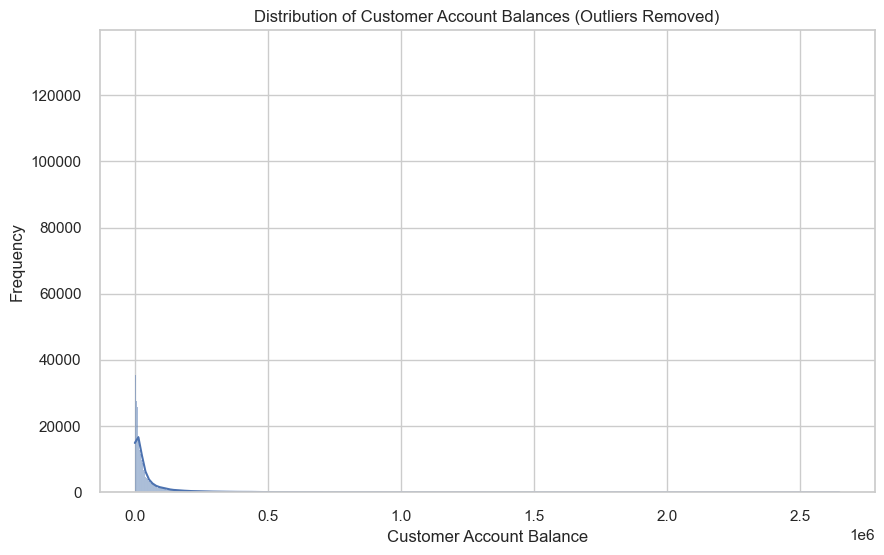

In [579]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming bank_transactions_df is your DataFrame with the 'CustAccountBalance' column

# Calculate Z-scores for 'CustAccountBalance'
z_scores = zscore(bank_transactions_df['CustAccountBalance'])

# Define a Z-score threshold for outliers
z_score_threshold = 3

# Identify outliers based on Z-scores
outliers = (abs(z_scores) > z_score_threshold)

# Count the number of outliers
outliers_count = outliers.sum()
print(f"Number of outliers: {outliers_count}")

# Remove outliers and stick to the original DataFrame
bank_transactions_df = bank_transactions_df[~outliers]

# Visualize the distribution without outliers
plt.figure(figsize=(10, 6))
sns.histplot(data=bank_transactions_df, x='CustAccountBalance', kde=True)
plt.title('Distribution of Customer Account Balances (Outliers Removed)')
plt.xlabel('Customer Account Balance')
plt.ylabel('Frequency')
plt.show()



Based on the outcome of the Z-score we can say that there are 5111 outliers in the column CustAccountBalance. We decided to remove these out of the dataframe because cluster modelling is sensitive for outliers. 

Now we have created a new column named CustAccountBalance_Filtered is made out of the existing one. We used to Z-score to detect the outliers. These are filtered out of the CustAccountBalance and a new column is created. 

We'll do the same for the feature TransactionAmount (INR). But we choose a different method to detect the outliers. By using the IQR method, you focus on the central part of the data distribution, which is less sensitive to extreme values than methods like the standard deviation. This makes IQR a robust measure for identifying potential outliers. The factor of 1.5 is a common choice, but it can be adjusted based on the desired level of sensitivity to outliers.

Original DataFrame shape: (1043455, 9)
DataFrame shape after removing outliers: (1034012, 9)


/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

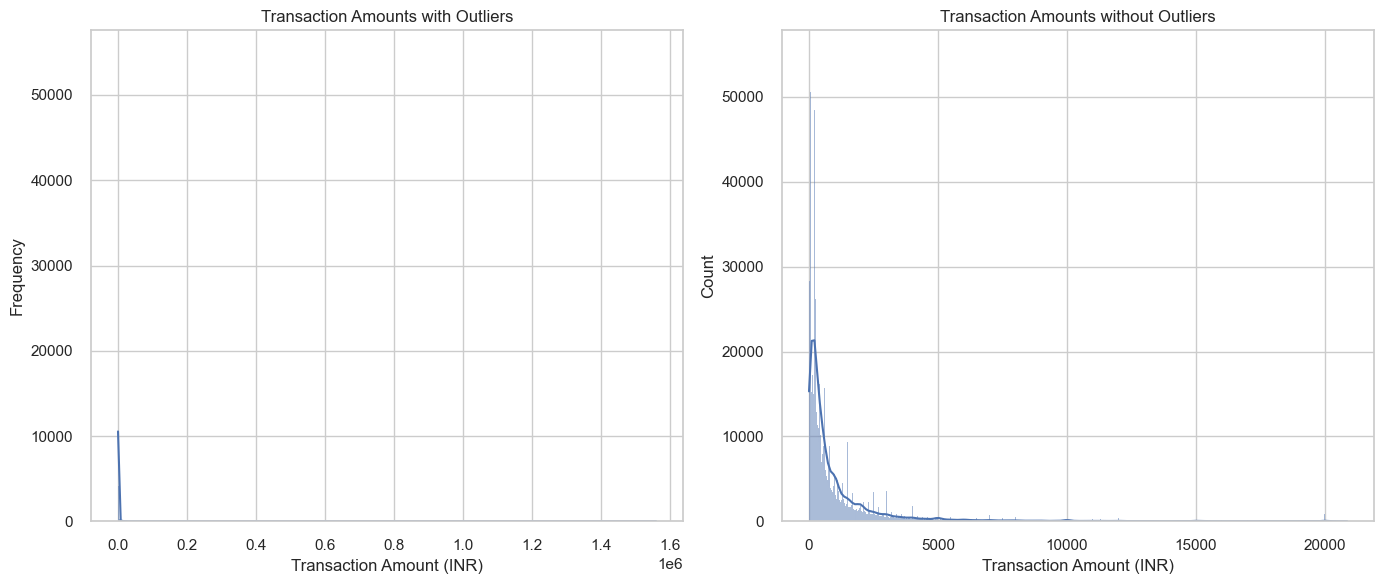

In [580]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming bank_transactions_df is your DataFrame with the 'TransactionAmount (INR)' column

# Calculate Z-scores for 'TransactionAmount (INR)'
z_scores = zscore(bank_transactions_df['TransactionAmount (INR)'])

# Define a threshold for outlier removal (e.g., Z-score > 3 or < -3)
outlier_threshold = 3

# Remove outliers based on the Z-score
bank_transactions_df_no_outliers = bank_transactions_df[(abs(z_scores) <= outlier_threshold)]

# Display the updated dataframe without outliers
print("Original DataFrame shape:", bank_transactions_df.shape)
print("DataFrame shape after removing outliers:", bank_transactions_df_no_outliers.shape)

# Visualizing the transaction amounts with and without outliers
plt.figure(figsize=(14, 6))

# Plotting the distribution with outliers
plt.subplot(1, 2, 1)
sns.histplot(bank_transactions_df['TransactionAmount (INR)'], kde=True)
plt.title('Transaction Amounts with Outliers')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Frequency')

# Plotting the distribution without outliers
plt.subplot(1, 2, 2)
sns.histplot(bank_transactions_df_no_outliers['TransactionAmount (INR)'], kde=True)
plt.title('Transaction Amounts without Outliers')
plt.xlabel('Transaction Amount (INR)')

plt.tight_layout()
plt.show()

In [581]:
# Calculate the threshold for the top 1%
threshold = bank_transactions_df['CustAccountBalance'].quantile(0.99)

# Filter the DataFrame to include only values in the top 1%
top_1_percent_values = bank_transactions_df[bank_transactions_df['CustAccountBalance'] > threshold]

# Get the number of values in the top 1%
num_top_1_percent_values = top_1_percent_values.shape[0]

print("Number of values in the top 1% of CustAccountBalance:", num_top_1_percent_values)

Number of values in the top 1% of CustAccountBalance: 10411


In [582]:
# Calculate the threshold for the top 1%
threshold_transaction_amount = bank_transactions_df['TransactionAmount (INR)'].quantile(0.99)

# Filter the DataFrame to include only values in the top 1%
top_1_percent_transaction_amount = bank_transactions_df[bank_transactions_df['TransactionAmount (INR)'] > threshold_transaction_amount]

# Get the number of values in the top 1%
num_top_1_percent_transaction_amount = top_1_percent_transaction_amount.shape[0]

print("Number of values in the top 1% of TransactionAmount (INR):", num_top_1_percent_transaction_amount)

Number of values in the top 1% of TransactionAmount (INR): 9823


### 2.4 Feature engineering 
Now that we have traced and imputed the NaN values. And also detected the outliers using scatter plots and box plots, it is time to transform the features to make them valuable and useful for research. 
For example, the feature CustLocation will have to be transformed. This is not yet a numeric value. Using dummy coding, feature engineering will be done. 

Feature engineering is the process of transforming raw data into a format that is more suitable for machine learning models. It involves creating new features or modifying existing ones to improve the performance of a machine learning algorithm. Feature engineering is a crucial step in the data preprocessing pipeline because the quality of the features used by a model has a significant impact on its predictive power.

### 2.4.1 Convert Customer Date of Birth into Age number 

In [583]:
import pandas as pd
import numpy as np
from datetime import datetime

# Assuming 'filter_df' is your DataFrame with transaction data
# Assuming 'CustomerDOB' is the column containing customer date of birth

# Convert 'CustomerDOB' to datetime format
bank_transactions_df['CustomerDOB'] = pd.to_datetime(bank_transactions_df['CustomerDOB'], errors='coerce')

# Calculate age based on the current date using numpy
current_date = datetime.now()
bank_transactions_df['Age'] = np.floor((current_date - bank_transactions_df['CustomerDOB']).dt.days / 365.25)

# Filter out rows where 'Age' is not within the range 0-90 in the existing DataFrame
bank_transactions_df = bank_transactions_df[(bank_transactions_df['Age'] >= 0) & (bank_transactions_df['Age'] <= 90)]


In [584]:
# Check if Age values are between 0 and 90
age_within_range = bank_transactions_df['Age'].between(0, 90, inclusive='both')

# Check if all values are within the specified range
all_age_values_within_range = age_within_range.all()

# Display the result
if all_age_values_within_range:
    print("All Age values are within the range of 0 to 90 years old.")
else:
    print("Some Age values are outside the range of 0 to 90 years old.")


All Age values are within the range of 0 to 90 years old.


In the above lines of code we convert Date of Birth into Age numbers. This will be more helpfull for further analysis. We also removed weird values for Age and removed the outliers that are not within the Age range of 0-90 years. 

### 2.4.2 Dummy coding on CustLocation and CustGender

In [585]:
dummy_df = bank_transactions_df.copy() # Make a copy of the cleaned dataframe after outlier removal and imputation of NaN values

In [586]:
dummy_df.head() # Visualize the dataset 

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,29.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,27.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,50.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,35.0
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,31.0


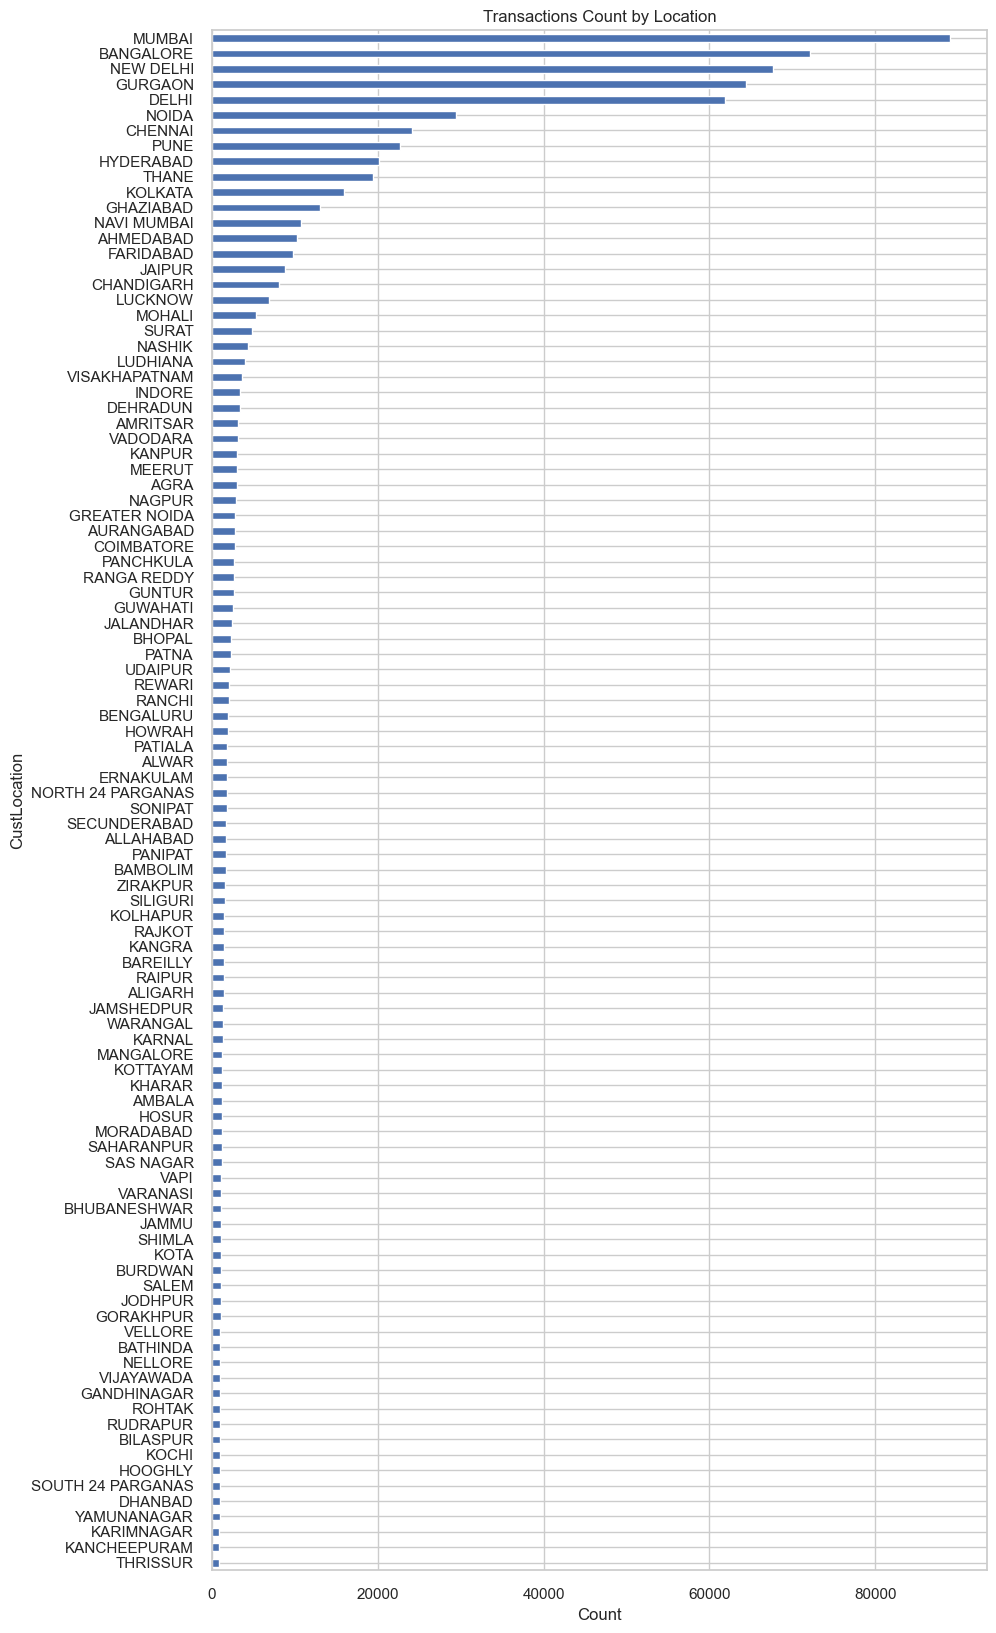

CustLocation
Other           196778
MUMBAI           89034
BANGALORE        72143
NEW DELHI        67661
GURGAON          64390
                 ...  
DHANBAD            914
YAMUNANAGAR        913
KARIMNAGAR         881
KANCHEEPURAM       873
THRISSUR           868
Name: count, Length: 101, dtype: int64


In [587]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming bank_transactions_df is your DataFrame and 'CustLocation' is your column

# You have already calculated location_counts
location_counts = dummy_df['CustLocation'].value_counts()

# Visualize the transaction counts by location
plt.figure(figsize=(10, 20))  # Adjust size as needed
location_counts.head(100).plot(kind='barh')  # Display top 100 locations
plt.gca().invert_yaxis()  # Highest count at the top
plt.xlabel('Count')
plt.title('Transactions Count by Location')
plt.show()

# Identify the top 100 cities
top_100_cities = location_counts.head(100).index

# Replace other cities with 'Other'
dummy_df['CustLocation'] = dummy_df['CustLocation'].apply(lambda x: x if x in top_100_cities else 'Other')

# Optionally, check the modification
print(dummy_df['CustLocation'].value_counts())



In [588]:
# Print the number of unique values in 'CustLocation' column
num_unique_cities = dummy_df['CustLocation'].nunique()
print("Number of unique values in CustLocation:", num_unique_cities)


Number of unique values in CustLocation: 101


In [589]:
# Calculate the total number of transactions
total_transactions = len(dummy_df)

# Calculate the number of transactions in the top 100 cities
top_100_transactions = dummy_df['CustLocation'].isin(top_100_cities).sum()

# Calculate the number of transactions in the "Other" category
other_transactions = total_transactions - top_100_transactions

# Calculate the percentage
percentage_top_100 = (top_100_transactions / total_transactions) * 100
percentage_other = (other_transactions / total_transactions) * 100

# Print the results
print(f"Percentage of transactions in the top 100 cities: {percentage_top_100:.2f}%")
print(f"Percentage of transactions in the 'Other' category: {percentage_other:.2f}%")


Percentage of transactions in the top 100 cities: 78.16%
Percentage of transactions in the 'Other' category: 21.84%


In [590]:
import pandas as pd

# Assuming 'bank_transactions_df' is your DataFrame and 'CustLocation' is the column you want to dummy code
dummy_cities = pd.get_dummies(dummy_df['CustLocation'], prefix='City', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
dummy_df = pd.concat([dummy_df, dummy_cities], axis=1)

# Optionally, you can drop the original 'CustLocation' column if you want to keep only the dummy-coded columns
# bank_transactions_df = bank_transactions_df.drop('CustLocation', axis=1)

# Display the updated DataFrame
print(dummy_df.head())


  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   
6            T7   C7126560  1992-01-26          F       MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-02-08           143207   
2            17874.44      2016-02-08           142712   
3           866503.21      2016-02-08           142714   
4             6714.43      2016-02-08           181156   
6              973.46      2016-02-08           173806   

   TransactionAmount (INR)   Age  ...  City_UDAIPUR  City_VADODARA  City_VAPI  \
0                     25.0  29.0  ...         False          False      False   
2                    459.0  27.0  ...         False          False      False   
3          

In [591]:
# Assuming 'bank_transactions_df' is your DataFrame

# Identify the columns to convert to integer type
city_columns_to_convert = [col for col in dummy_df.columns if col.startswith('City_')]

# Convert the selected columns to integer type
dummy_df[city_columns_to_convert] = dummy_df[city_columns_to_convert].astype(int)

# Display the updated DataFrame
print(dummy_df.head())


  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   
6            T7   C7126560  1992-01-26          F       MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-02-08           143207   
2            17874.44      2016-02-08           142712   
3           866503.21      2016-02-08           142714   
4             6714.43      2016-02-08           181156   
6              973.46      2016-02-08           173806   

   TransactionAmount (INR)   Age  ...  City_UDAIPUR  City_VADODARA  City_VAPI  \
0                     25.0  29.0  ...             0              0          0   
2                    459.0  27.0  ...             0              0          0   
3          

In [592]:
dummy_df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,...,City_UDAIPUR,City_VADODARA,City_VAPI,City_VARANASI,City_VELLORE,City_VIJAYAWADA,City_VISAKHAPATNAM,City_WARANGAL,City_YAMUNANAGAR,City_ZIRAKPUR
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,29.0,...,0,0,0,0,0,0,0,0,0,0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,27.0,...,0,0,0,0,0,0,0,0,0,0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,50.0,...,0,0,0,0,0,0,0,0,0,0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,35.0,...,0,0,0,0,0,0,0,0,0,0
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,31.0,...,0,0,0,0,0,0,0,0,0,0


In [593]:
# Create dummy variables for 'CustGender'
dummy_gender = pd.get_dummies(dummy_df['CustGender'], prefix='CustGender', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
dummy_df = pd.concat([dummy_df, dummy_gender], axis=1) 

In [594]:
# Identify the dummy column for 'CustGender'
dummy_gender_column = 'CustGender_M'  # Adjust the column name based on your actual data

# Convert the selected dummy column to integer type
dummy_df[dummy_gender_column] = dummy_df[dummy_gender_column].astype(int)

# Display the updated DataFrame
dummy_df.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,...,City_VADODARA,City_VAPI,City_VARANASI,City_VELLORE,City_VIJAYAWADA,City_VISAKHAPATNAM,City_WARANGAL,City_YAMUNANAGAR,City_ZIRAKPUR,CustGender_M
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,29.0,...,0,0,0,0,0,0,0,0,0,0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,27.0,...,0,0,0,0,0,0,0,0,0,0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,50.0,...,0,0,0,0,0,0,0,0,0,0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,35.0,...,0,0,0,0,0,0,0,0,0,0
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,31.0,...,0,0,0,0,0,0,0,0,0,0


In [595]:
# Assuming 'dummy_df' is your DataFrame and 'CustLocation' and 'CustGender' are the columns to drop
columns_to_drop = ['CustLocation', 'CustGender']

# Drop the specified columns from the DataFrame
dummy_df = dummy_df.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(dummy_df.head())


  TransactionID CustomerID CustomerDOB  CustAccountBalance TransactionDate  \
0            T1   C5841053  1994-10-01            17819.05      2016-02-08   
2            T3   C4417068  1996-11-26            17874.44      2016-02-08   
3            T4   C5342380  1973-09-14           866503.21      2016-02-08   
4            T5   C9031234  1988-03-24             6714.43      2016-02-08   
6            T7   C7126560  1992-01-26              973.46      2016-02-08   

   TransactionTime  TransactionAmount (INR)   Age  City_AHMEDABAD  \
0           143207                     25.0  29.0               0   
2           142712                    459.0  27.0               0   
3           142714                   2060.0  50.0               0   
4           181156                   1762.5  35.0               0   
6           173806                    566.0  31.0               0   

   City_ALIGARH  ...  City_VADODARA  City_VAPI  City_VARANASI  City_VELLORE  \
0             0  ...              0  

In [596]:
# Rename 'CustGender_M' to 'Gender'
dummy_df.rename(columns={'CustGender_M': 'Gender'}, inplace=True)

In [597]:
dummy_df

,TransactionID,CustomerID,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,City_AHMEDABAD,City_ALIGARH,...,City_VADODARA,City_VAPI,City_VARANASI,City_VELLORE,City_VIJAYAWADA,City_VISAKHAPATNAM,City_WARANGAL,City_YAMUNANAGAR,City_ZIRAKPUR,Gender
0,T1,C5841053,1994-10-01,17819.05,2016-02-08,143207,25.0,29.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,T3,C4417068,1996-11-26,17874.44,2016-02-08,142712,459.0,27.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,T4,C5342380,1973-09-14,866503.21,2016-02-08,142714,2060.0,50.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,T5,C9031234,1988-03-24,6714.43,2016-02-08,181156,1762.5,35.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,T7,C7126560,1992-01-26,973.46,2016-02-08,173806,566.0,31.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,7635.19,2016-09-18,184824,799.0,33.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1048563,T1048564,C6459278,1992-02-20,27311.42,2016-09-18,183734,460.0,31.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1048564,T1048565,C6412354,1989-05-18,221757.06,2016-09-18,183313,770.0,34.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1048565,T1048566,C6420483,1978-08-30,10117.87,2016-09-18,184706,1000.0,45.0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [598]:
# Assuming 'dummy_df' is your DataFrame and you want to save it to a CSV file named 'dummy_df.csv'
dummy_df.to_csv('dummy_df.csv', index=False)

### 3. EDA (Exploratory Data Analysis)

In [473]:
# Define the age group bins and labels
age_bins = [0, 18, 30, 45, 60, 90]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-90']

# Apply pd.cut to create a new categorical column for age groups
df_dummified['AgeGroup'] = pd.cut(filter_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True, right=False)


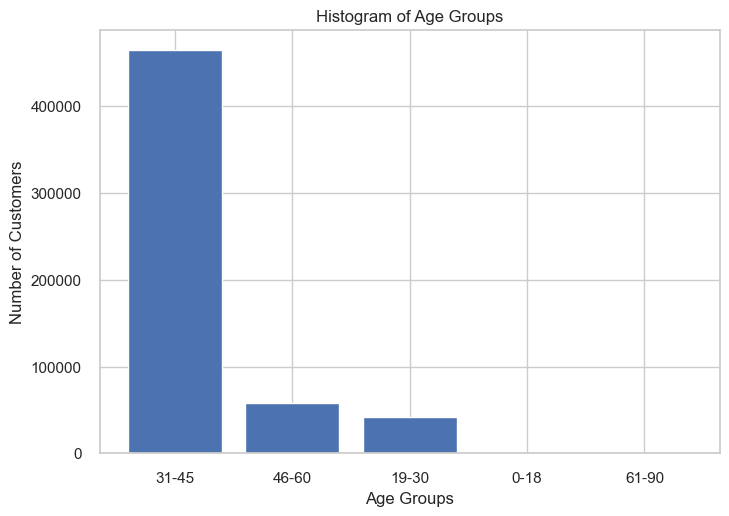

In [474]:
# Create a histogram for the 'AgeGroup' column
age_group_counts = df_dummified['AgeGroup'].value_counts()

# Plot the histogram
plt.bar(age_group_counts.index, age_group_counts.values)

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Number of Customers')
plt.title('Histogram of Age Groups')

# Show the plot
plt.show()

### 2.4.4 Convert Transaction Time into categorical values (Morning, Afternoon and Evening) 

In [475]:
# Define time ranges for Morning, Afternoon, and Evening
time_ranges = [0, 80000, 160000, 240000]  # Adjust as needed

# Define corresponding labels
time_labels = ['Morning', 'Afternoon', 'Evening']

# Apply pd.cut to create a new categorical column
df_dummified['TransactionTime_Category'] = pd.cut(df_dummified['TransactionTime'], bins=time_ranges, labels=time_labels, include_lowest=True, right=False)

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


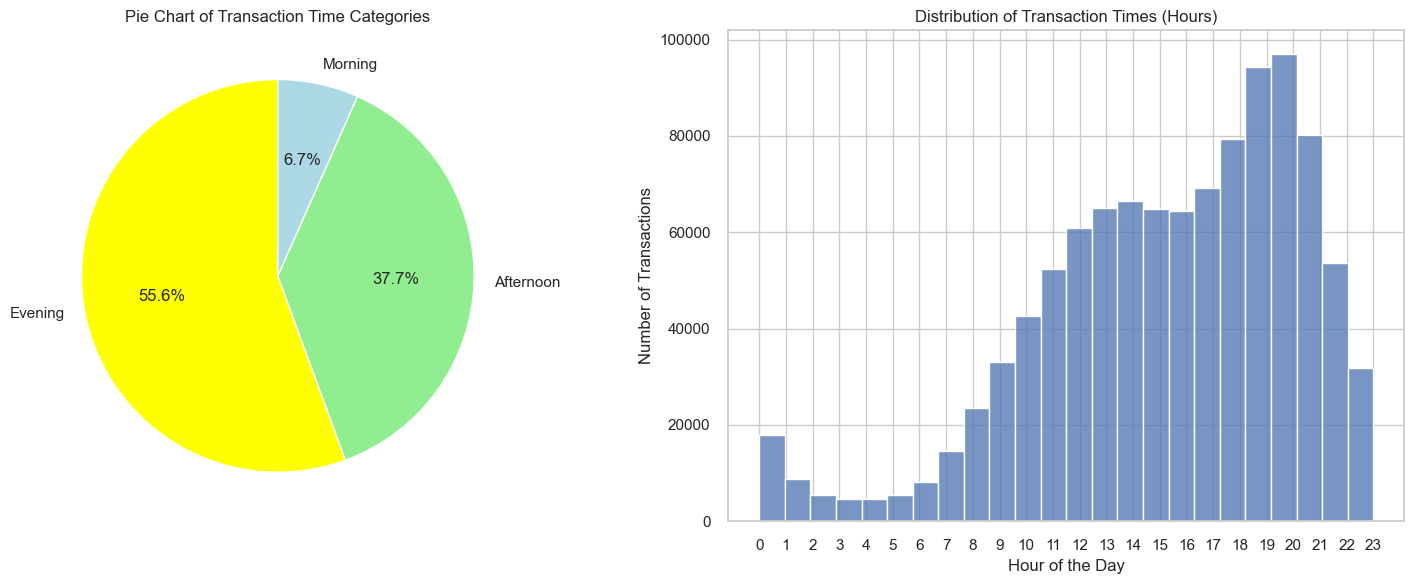

In [476]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the path to your CSV file
file_path = "/Users/hiddebrink/Desktop/bank_transactions.csv"

# Initialize a list to store the hours of transactions
transaction_hours = []

# Define the chunk size
chunk_size = 50000

# Read the CSV file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Convert 'TransactionTime' to a string and pad with zeros to ensure it's in HHMMSS format
    chunk['TransactionTime'] = chunk['TransactionTime'].astype(str).str.zfill(6)

    # Extract the hour part and convert to integer
    chunk['Hour'] = chunk['TransactionTime'].str.slice(0, 2).astype(int)

    # Append the hour data to the list
    transaction_hours.extend(chunk['Hour'])

# Convert the list to a DataFrame for plotting
transaction_hours_df = pd.DataFrame(transaction_hours, columns=['Hour'])

# Create a pie chart for 'TransactionTime_Category'
time_category_counts = df_dummified['TransactionTime_Category'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the pie chart
axes[0].pie(time_category_counts, labels=time_category_counts.index, autopct='%1.1f%%', startangle=90, colors=['yellow', 'lightgreen', 'lightblue'])
axes[0].set_title('Pie Chart of Transaction Time Categories')

# Plotting the distribution of transaction hours
sns.histplot(transaction_hours_df['Hour'], bins=24, kde=False, ax=axes[1])
axes[1].set_title('Distribution of Transaction Times (Hours)')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_xticks(range(0, 24))

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

**Clarification of the transaction times during the day:**

We categorized transaction times into three periods: morning, afternoon, and evening, and visualized the distribution of transactions across these periods using a pie chart. The majority of transactions occurred in the evening, constituting 55% of the total. Afternoon transactions accounted for 38.3%, while morning transactions were the least frequent at 6.7%.

Additionally, we examined the transaction frequency at different hours throughout the day. In the morning, the highest transaction volume was observed around 11 am, totaling 50,000 transactions. During the afternoon, transactions remained relatively steady, with slight spikes at 14:00 and 17:00. In the evening, prominent peaks occurred at 19:00 and 20:00.

The elevated transaction activity during specific hours may be attributed to various factors, such as customer habits, business hours, or promotional activities. For instance, the surge in transactions at 11 am could be linked to the commencement of regular business hours, while evening peaks might coincide with after-work hours or promotional events. Analyzing these patterns provides insights into the temporal dynamics of banking transactions and can inform strategic decision-making for the financial institution.

In [477]:
df_dummified

,TransactionID,CustomerID,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustAccountBalance_Filtered,Age,...,Month_8,Month_9,Month_10,Month_11,Month_12,TransactionSeason_Spring,TransactionSeason_Summer,TransactionSeason_Winter,AgeGroup,TransactionTime_Category
2,T3,C4417068,1996-11-26,F,17874.44,2016-02-08,142712,459.0,17874.44,27.0,...,0,0,0,0,0,0,0,1,19-30,Afternoon
3,T4,C5342380,1973-09-14,F,866503.21,2016-02-08,142714,2060.0,866503.21,50.0,...,0,0,0,0,0,0,0,1,46-60,Afternoon
4,T5,C9031234,1988-03-24,F,6714.43,2016-02-08,181156,1762.5,6714.43,35.0,...,0,0,0,0,0,0,0,1,31-45,Evening
6,T7,C7126560,1992-01-26,F,973.46,2016-02-08,173806,566.0,973.46,31.0,...,0,0,0,0,0,0,0,1,31-45,Evening
7,T8,C1220223,1982-01-27,M,95075.54,2016-02-08,170537,148.0,95075.54,41.0,...,0,0,0,0,0,0,0,1,31-45,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048560,T1048561,C5028150,1980-05-24,M,464.87,2016-09-18,184632,3000.0,464.87,43.0,...,0,1,0,0,0,0,0,0,31-45,Evening
1048561,T1048562,C1034220,1992-11-19,M,1212.70,2016-09-18,184734,1500.0,1212.70,31.0,...,0,1,0,0,0,0,0,0,31-45,Evening
1048562,T1048563,C8020229,1990-08-04,M,7635.19,2016-09-18,184824,799.0,7635.19,33.0,...,0,1,0,0,0,0,0,0,31-45,Evening
1048564,T1048565,C6412354,1989-05-18,M,221757.06,2016-09-18,183313,770.0,221757.06,34.0,...,0,1,0,0,0,0,0,0,31-45,Evening


### 2.4.5 Convert Transaction Date into seasonality categories 

In [478]:
# Extract the month from the 'TransactionDate'
df_dummified['Month'] = filter_df['TransactionDate'].dt.month

# Define the season categories based on months
season_categories = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

# Map the season categories to the 'Month' column
df_dummified['TransactionSeason'] = df_dummified['Month'].map(season_categories)

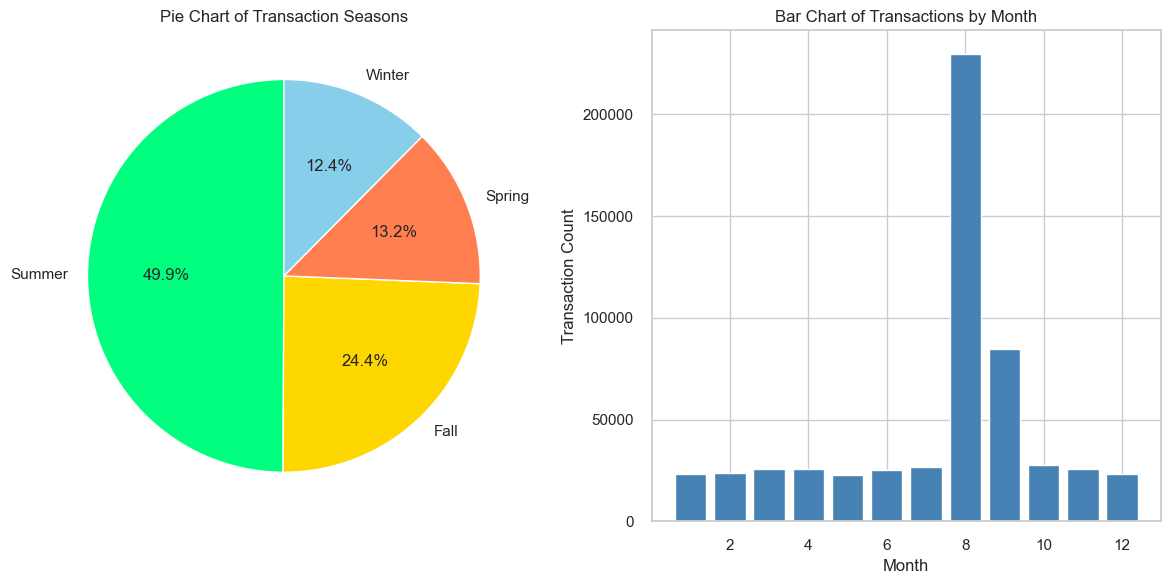

In [479]:
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Pie chart for TransactionSeason
season_counts = df_dummified['TransactionSeason'].value_counts()
axs[0].pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90, colors=['springgreen', 'gold', 'coral', 'skyblue'])
axs[0].set_title('Pie Chart of Transaction Seasons')

# Subplot 2: Bar chart for transactions by month
month_counts = df_dummified['Month'].value_counts().sort_index()
axs[1].bar(month_counts.index, month_counts, color='steelblue')
axs[1].set_title('Bar Chart of Transactions by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Transaction Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Clarification of the number of transactions during the year:**

The initial visual representation illustrates the distribution of bank transactions across seasons through a pie chart. Notably, the summer season stands out with the highest transaction frequency, accounting for 49.8% of the total. Spring follows suit, contributing a substantial quarter to the overall transaction count.

Upon further examination of the monthly transaction data, a distinct peak becomes apparent in July. This surge could potentially be attributed to individuals going on vacation and making corresponding withdrawals. It was anticipated that December might exhibit a similar spike, given increased spending during the holiday season. However, this expected trend is not distinctly evident in the data or the accompanying bar chart.

## *4. EDA (Exploratory Data Analyisis)*

### *Introduction*
In the previous chapter of this Jupyter Notebook, we made the dataset useful for further research and building the cluster model. 
In this chapter EDA (Exploratory Data Analyses), the features from the dataset are further clarified one by one. It then examines the links between the different features. 
Other components associated with EDA have already been addressed earlier in this notebook. These include the detection and dealing with outliers, and the imputation of NaN values in the dataset. 

### 4.1 Basic Statistics

Now we read in the cleaned dataframe in again. We earlier performed NaN detection and imputation and also detect and removed the outliers. 

In [547]:
bank_transactions_df.head() # Read in the clean dataset

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,29.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,27.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,50.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,35.0
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,31.0


In [ ]:
# See how CustGender feature is distributed 


### 4.2 Multivariate case

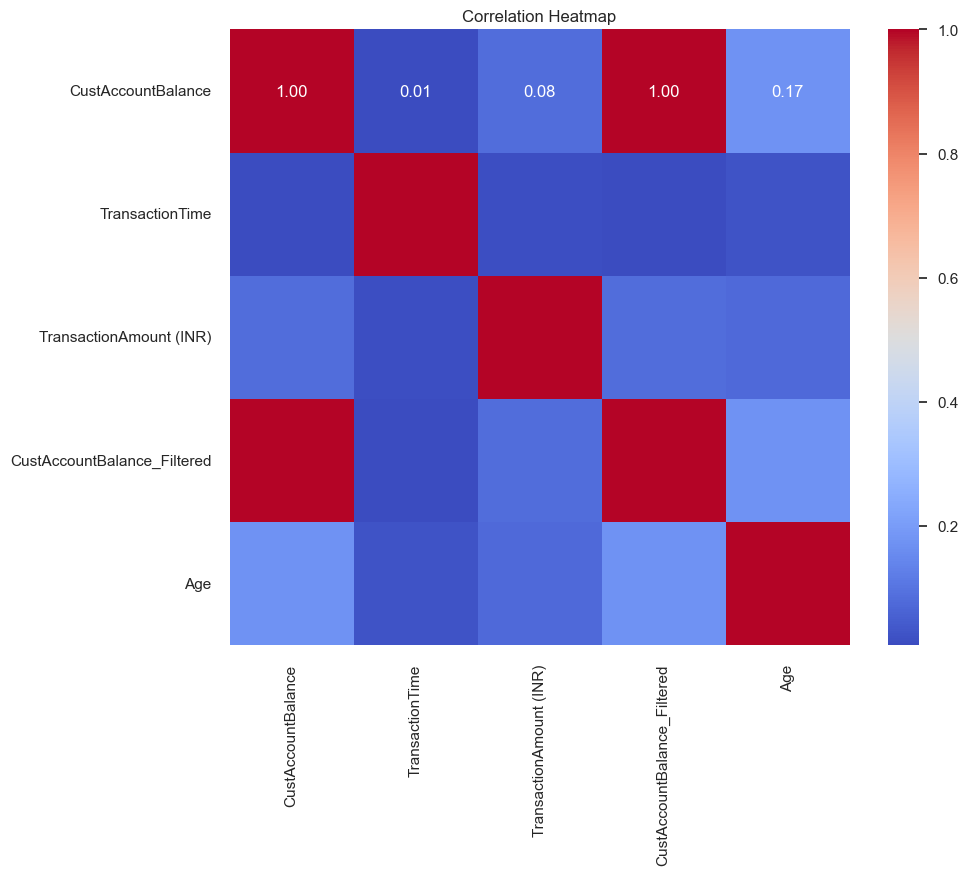

In [484]:
# Select numerical columns only
numerical_columns = filter_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numerical columns
corr = filter_df[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

A heatmap was developed to show the correlation between numeric features. We see some form of correlation between the following numeric features: 

- Age - Customer Account Balance = 0.17 
- Customer Account Balance - Transaction Amount = 0.08 

In [485]:
top_locations = filter_df['CustLocation'].value_counts().head(20)
print(top_locations)

CustLocation
MUMBAI         89034
BANGALORE      72143
NEW DELHI      67661
GURGAON        64390
DELHI          61858
NOIDA          29389
CHENNAI        24187
PUNE           22699
HYDERABAD      20134
THANE          19401
KOLKATA        15909
GHAZIABAD      13000
NAVI MUMBAI    10735
AHMEDABAD      10264
FARIDABAD       9762
JAIPUR          8866
CHANDIGARH      8103
LUCKNOW         6844
MOHALI          5282
SURAT           4828
Name: count, dtype: int64


### 4.2.1 Average Account balance and Transaction amount per transaction in the Top 20 cities of India

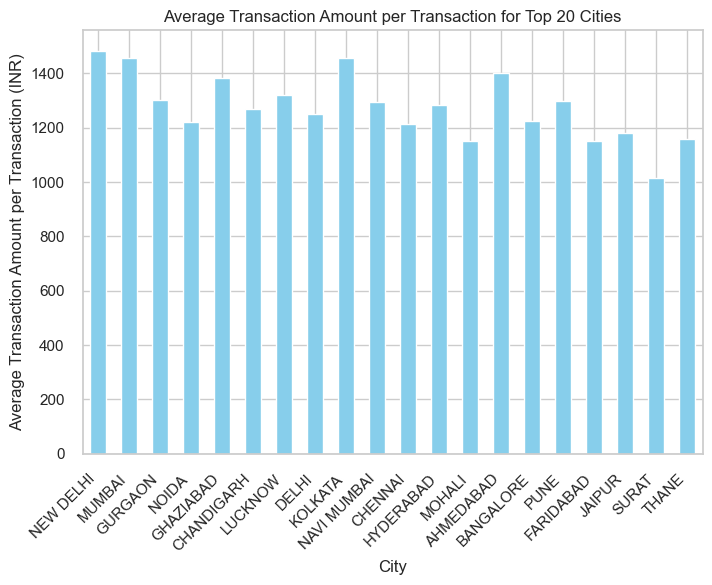

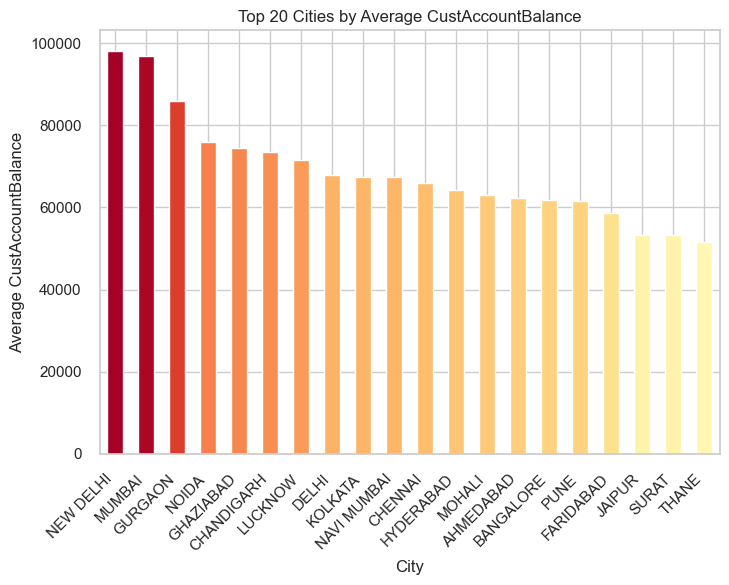

In [486]:
# Assuming 'filter_df' is your DataFrame with columns 'CustLocation', 'CustAccountBalance', and 'TransactionAmount (INR)'
# Replace 'filter_df' with the actual variable or DataFrame name in your code

# Get the top 20 most common cities
top_cities = filter_df['CustLocation'].value_counts().head(20)

# Group by city and calculate the average CustAccountBalance and average transaction amount for each city
grouped_data = filter_df.groupby('CustLocation').agg({
    'CustAccountBalance': 'mean',
    'TransactionAmount (INR)': 'mean'
}).loc[top_cities.index]

# Sort cities by average CustAccountBalance in descending order
sorted_data = grouped_data.sort_values(by='CustAccountBalance', ascending=False)

# Define a color gradient from dark red to light green for CustAccountBalance
colors_balance = plt.cm.RdYlGn_r(sorted_data['CustAccountBalance'] / max(sorted_data['CustAccountBalance']))

# Plot the bar chart for average Transaction Amount per Transaction
sorted_data['TransactionAmount (INR)'].plot(kind='bar', color='skyblue')
plt.title('Average Transaction Amount per Transaction for Top 20 Cities')
plt.xlabel('City')
plt.ylabel('Average Transaction Amount per Transaction (INR)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

# Plot the bar chart for average CustAccountBalance
sorted_data['CustAccountBalance'].plot(kind='bar', color=colors_balance)
plt.title('Top 20 Cities by Average CustAccountBalance')
plt.xlabel('City')
plt.ylabel('Average CustAccountBalance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


**CustAccountBalance Chart:**

New Delhi, Mumbai, and Gurgaon have the highest average customer account balances, indicating a concentration of wealth or higher savings in these cities.
The average balance gradually decreases from New Delhi to Thane, with a sharper decline after Bangalore.
Transaction Amount Chart:

The average transaction amount per transaction is relatively consistent across the top 20 cities, with no city showing a significantly higher or lower average than others.
New Delhi, which had the highest average balance, does not lead in transaction amounts, suggesting that a higher balance does not necessarily equate to higher transaction volumes.

In [487]:
# Sort the DataFrame by CustAccountBalance in descending order
sorted_df = filter_df.sort_values(by='CustAccountBalance', ascending=False)

# Calculate the cumulative sum of CustAccountBalance
cumulative_sum = sorted_df['CustAccountBalance'].cumsum()

# Find the index where cumulative sum crosses 80% of the total sum
index_80_percent = (cumulative_sum / cumulative_sum.max()).searchsorted(0.8)

# Extract the top cities based on the calculated index
top_cities = sorted_df['CustLocation'].iloc[:index_80_percent]

# Display the result
print(f"Total number of cities needed to cover 80% of CustAccountBalance: {len(top_cities)}")
print("Top cities:")
print(top_cities)

Total number of cities needed to cover 80% of CustAccountBalance: 163858
Top cities:
910078    NEW DELHI
707378    NEW DELHI
133843    NEW DELHI
203196    NEW DELHI
375580    NEW DELHI
            ...    
795117       MUMBAI
989967       MUMBAI
441935       MUMBAI
644591       MUMBAI
659838       MUMBAI
Name: CustLocation, Length: 163858, dtype: object


In [488]:
# Extract the top cities based on the calculated index
top_cities = sorted_df['CustLocation'].iloc[:index_80_percent]

# Get unique values of top cities
unique_top_cities = top_cities.unique()

# Display the result
print(f"Total number of unique cities needed to cover 80% of TransactionAmount (INR): {len(unique_top_cities)}")
print("Unique top cities:")
print(unique_top_cities)


Total number of unique cities needed to cover 80% of TransactionAmount (INR): 1988
Unique top cities:
['NEW DELHI' 'AZAD NAGAR MUMBAI' 'MARGAO' ... 'ALTOTORDA BARDEZ'
 'RD MUMBAI' 'APPT PATNA']


In [489]:
# Extract the top cities based on the calculated index
top_cities = sorted_df['CustLocation'].iloc[:index_80_percent]

# Get unique values of top cities
unique_top_cities = top_cities.unique()

# Display the result
print(f"Total number of unique cities needed to cover 80% of CustAccountBalance: {len(unique_top_cities)}")
print("Unique top cities:")
print(unique_top_cities)

Total number of unique cities needed to cover 80% of CustAccountBalance: 1988
Unique top cities:
['NEW DELHI' 'AZAD NAGAR MUMBAI' 'MARGAO' ... 'ALTOTORDA BARDEZ'
 'RD MUMBAI' 'APPT PATNA']


In [490]:
# Calculate the total transaction amount
total_transaction_amount = sorted_df['TransactionAmount (INR)'].sum()

# Extract the top 20 cities
top_20_cities = sorted_df['CustLocation'].iloc[:20]

# Calculate the transaction amount for the top 20 cities
top_20_transaction_amount = sorted_df.loc[sorted_df['CustLocation'].isin(top_20_cities), 'TransactionAmount (INR)'].sum()

# Calculate the percentage
percentage_captured = (top_20_transaction_amount / total_transaction_amount) * 100

# Display the result
print(f"Percentage of Transaction Amount captured by top 20 cities: {percentage_captured:.2f}%")


Percentage of Transaction Amount captured by top 20 cities: 22.34%


In [491]:
# Calculate the total number of transactions
total_transactions = len(sorted_df)

# Extract the top 20 cities
top_20_cities = sorted_df['CustLocation'].iloc[:20]

# Calculate the number of transactions for the top 20 cities
top_20_transactions = sorted_df.loc[sorted_df['CustLocation'].isin(top_20_cities)]

# Calculate the percentage
percentage_transactions_captured = (len(top_20_transactions) / total_transactions) * 100

# Display the result
print(f"Percentage of Transactions captured by top 20 cities: {percentage_transactions_captured:.2f}%")


Percentage of Transactions captured by top 20 cities: 20.09%


### 4.2.2 Average Transaction Amount per time of the day (Morning, Afternoon and Evening)

In [492]:
# Set the style for the plot
sns.set(style="whitegrid")

# Calculate the average transaction amount per time category
avg_amount_by_time = filter_df.groupby('TransactionTime_Category')['TransactionAmount (INR)'].mean().sort_values(ascending=False)

# Plot a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_amount_by_time.index, y=avg_amount_by_time, palette='viridis')

# Add labels and title
plt.xlabel('Transaction Time Category')
plt.ylabel('Average Transaction Amount (INR)')
plt.title('Average Transaction Amount per Time of Day')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

KeyError: 'TransactionTime_Category'

### 4.2.3 Average Customer Account Balance per Age Group 

/var/folders/0j/7cx806gn37z1r7293__z9f_00000gn/T/ipykernel_98712/491136838.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_balance_by_age_group = filter_df.groupby('AgeGroup')['CustAccountBalance'].mean().sort_values(ascending=False)
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tr

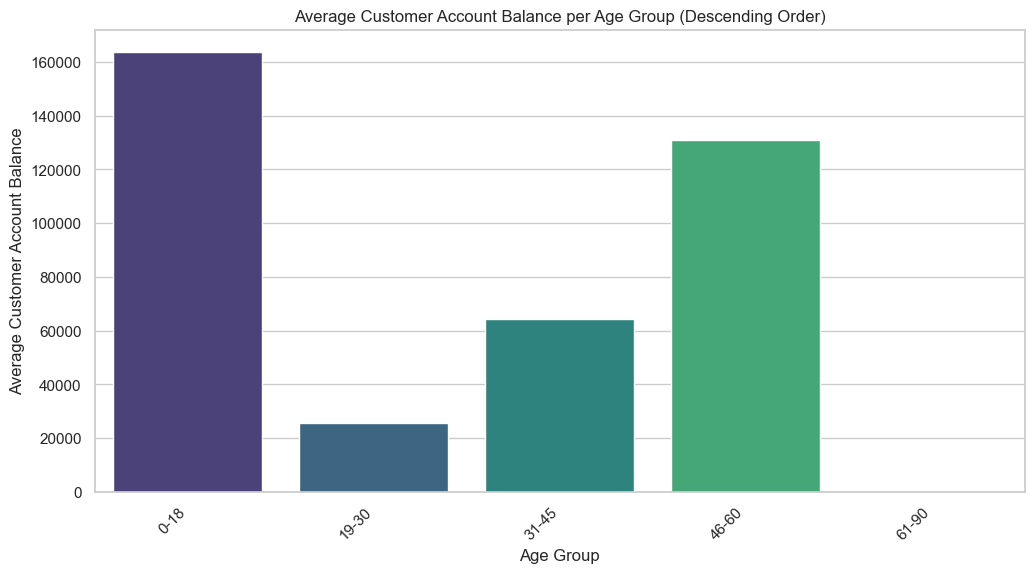

In [ ]:
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Calculate the average CustAccountBalance per AgeGroup and sort in descending order
avg_balance_by_age_group = filter_df.groupby('AgeGroup')['CustAccountBalance'].mean().sort_values(ascending=False)

# Determine the color palette in the order of the sorted values
color_palette = sns.color_palette("viridis", n_colors=len(avg_balance_by_age_group))

# Plot a bar plot with the sorted color palette
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_balance_by_age_group.index, y=avg_balance_by_age_group, palette=color_palette)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Average Customer Account Balance')
plt.title('Average Customer Account Balance per Age Group (Descending Order)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


### 4.2.4 Total transactions and average transactions per season

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

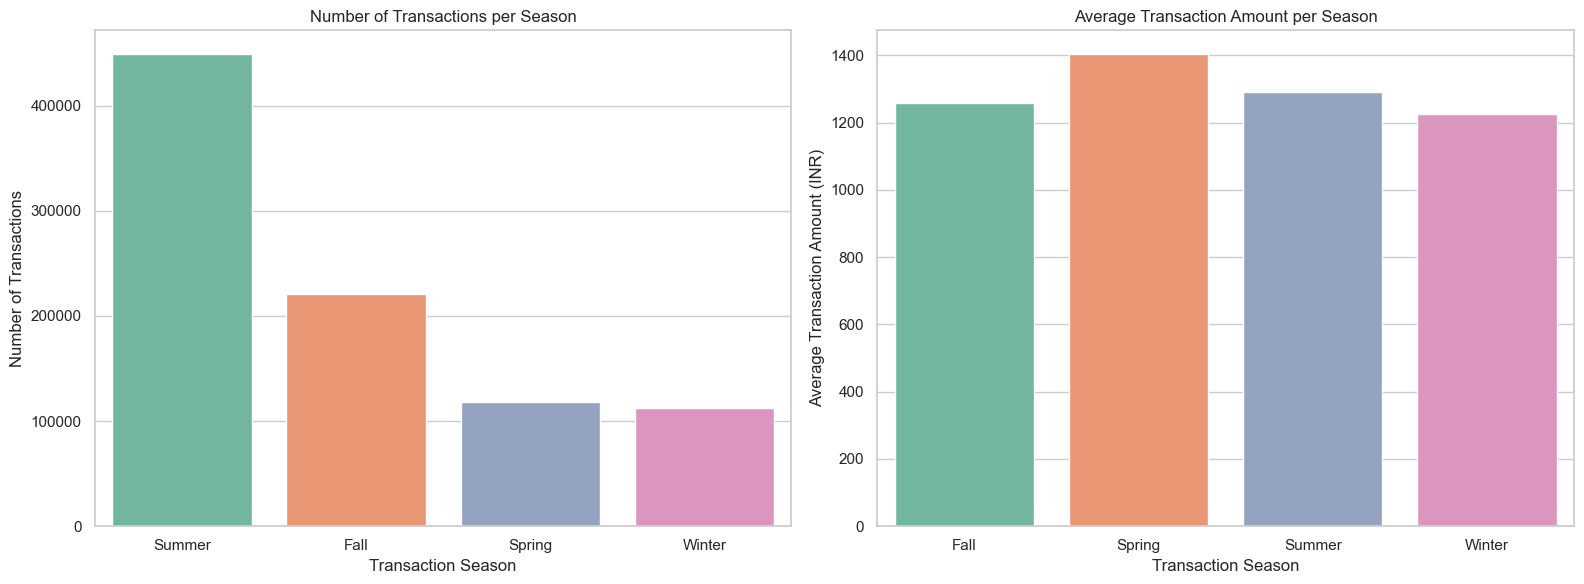

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'filter_df' is your DataFrame with the necessary columns

# Set the style for the plot
sns.set(style="whitegrid")

# Count the number of transactions per season
transaction_counts_by_season = filter_df['TransactionSeason'].value_counts()

# Calculate average transaction amount per season
avg_transaction_amount_by_season = filter_df.groupby('TransactionSeason')['TransactionAmount (INR)'].mean()

# Create a subplot with 1 row and 2 columns
plt.figure(figsize=(16, 6))

# Plot the first bar plot for the number of transactions per season
plt.subplot(1, 2, 1)
sns.barplot(x=transaction_counts_by_season.index, y=transaction_counts_by_season, palette='Set2')
plt.xlabel('Transaction Season')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Season')

# Plot the second bar plot for average transaction amount per season
plt.subplot(1, 2, 2)
sns.barplot(x=avg_transaction_amount_by_season.index, y=avg_transaction_amount_by_season, palette='Set2')
plt.xlabel('Transaction Season')
plt.ylabel('Average Transaction Amount (INR)')
plt.title('Average Transaction Amount per Season')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()


**Conclusions from Seasonal Transaction Analysis:**
 1. Transaction Volume: There is a clear seasonal pattern in the number of transactions, with summer being the peak season.
 2. Transaction Amount: The average transaction amount is highest in fall, suggesting larger transactions during this season despite lower volume.
 3. Seasonal Trends: A sharp decline in transaction volume is observed from summer to fall, but the average transaction amount decreases less significantly.
 4. Potential Influences: Seasonal spending habits, holidays, and economic cycles could be influencing these trends, with summer activities boosting transaction volume and fall purchases increasing transaction value.

## 5. Principal Component Analysis (PCA)

### 5.1 Introduction


Principal Component Analysis (PCA) is a widely used dimensionality reduction technique in the field of data analysis and machine learning. Its primary goal is to transform a high-dimensional dataset into a lower-dimensional space while retaining as much of the original variability as possible. By identifying the principal components, which are linear combinations of the original features, PCA helps in simplifying the data representation and extracting the most informative aspects.

In practical terms, PCA is employed to address issues such as multicollinearity, reduce the curse of dimensionality, and enhance the interpretability of data. It is especially useful in scenarios where datasets have a large number of correlated variables, and understanding the underlying patterns becomes challenging.

The process involves calculating the eigenvectors and eigenvalues of the covariance matrix of the original data, and the principal components are then derived from these eigenvectors. These components represent the directions of maximum variance in the data. By selecting a subset of the principal components, one can effectively reduce the dimensionality of the dataset.

PCA finds applications in various domains, including image processing, feature engineering, and exploratory data analysis. It is a valuable tool for transforming complex datasets into a more manageable and interpretable form, facilitating improved insights and streamlined modeling processes.

### 5.2 Scaling and standardize the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_columns = df_dummified.select_dtypes(include=['number']).columns

# Instantiate StandardScaler
transactions_scaler = StandardScaler()

# Fit the scaler to the numeric columns in 'filtered_df'
transactions_scaler.fit(df_dummified[numeric_columns])

# Transform the numeric columns using the fitted scaler
df_scaled = pd.DataFrame(transactions_scaler.transform(df_dummified[numeric_columns]), columns=numeric_columns)

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

### 5.3 Performing PCA

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


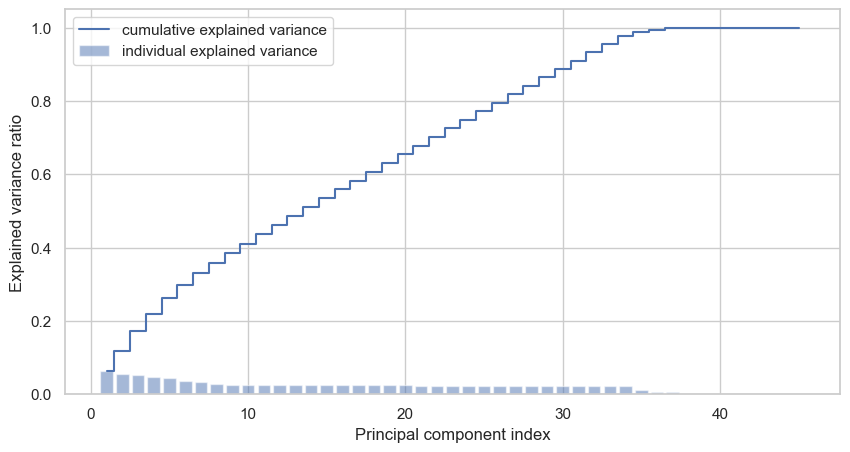

In [ ]:
## Performing PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_comps = pca.fit_transform(df_scaled) # pca components
var_exp = pca.explained_variance_ratio_ # variance explained ratio 
cum_var_exp = np.cumsum(var_exp) # cumulative variance

# plot of explained variances
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(1,len(var_exp)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [ ]:
#Let's say you would like to explain x% variance  
var_exp_thres = 0.85
#calling pcs instance with desired variance explained threshold
pca = PCA(var_exp_thres)  
pca_comps = pca.fit_transform(df_scaled)  
print('Number of components to explain {:0.0f}% variance is {}'.format(var_exp_thres*100, pca.n_components_))

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Number of components to explain 85% variance is 29


In [ ]:
# get the index of the most important feature on EACH component
# we do it using list comprehension
most_important_features_idx = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
most_important_features = df_scaled.columns[most_important_features_idx]

print('The most important features are:', most_important_features.values)

The most important features are: ['TransactionSeason_Summer' 'TransactionTime_Category_Evening'
 'AgeGroup_46-60' 'TransactionSeason_Winter' 'AgeGroup_31-45'
 'AgeGroup_19-30' 'Month_9' 'City_MUMBAI' 'Month_7' 'City_GURGAON'
 'City_BANGALORE' 'City_DELHI' 'Month_10' 'City_DELHI' 'City_NOIDA'
 'Month_6' 'Month_11' 'Month_3' 'Month_5' 'Month_12' 'City_CHENNAI'
 'City_HYDERABAD' 'City_THANE' 'City_GHAZIABAD' 'City_NAVI MUMBAI'
 'City_GHAZIABAD' 'City_NAVI MUMBAI' 'City_FARIDABAD' 'City_CHANDIGARH']


### 5.4 K-means clustering 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer  # $ pip install yellowbrick for the Elbow method

### 5.4.1 K-means clustering on the important Principal Components

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

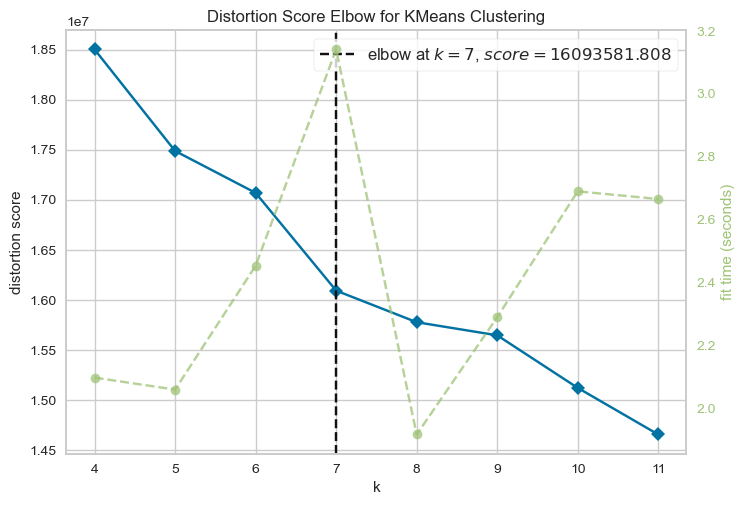

The best cluster number is: 7


In [ ]:
## performing the elbow method
# Instantiate the clustering model and visualizer
kmeans = KMeans(random_state=3092) # you should remove the random_state in general. This is done for demonstration purposes.
visualizer = KElbowVisualizer(kmeans, k=(4,12))
visualizer.fit(pca_comps)        #Fit the important PCA component data to the visualizer
visualizer.show()        # Finalize and render the figure
print('The best cluster number is:', visualizer.elbow_value_) # Get elbow value

*Conclusion:* The best number of clusters when performing K-means clustering on the most important Principal Components is 8 clusters. 

Now we have measured the best value for k with using the elbow method, we can fit the K-means clustering model with the best value 8. 

In [ ]:
kmeans_best_cluster = KMeans(n_clusters=visualizer.elbow_value_)
kmeans_best_cluster.fit(pca_comps)
#saving the cluster labels
Kmeans_clusters_PCs = kmeans_best_cluster.labels_

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 5.4.2 K-means clustering on the important features computed out of PCA

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: 

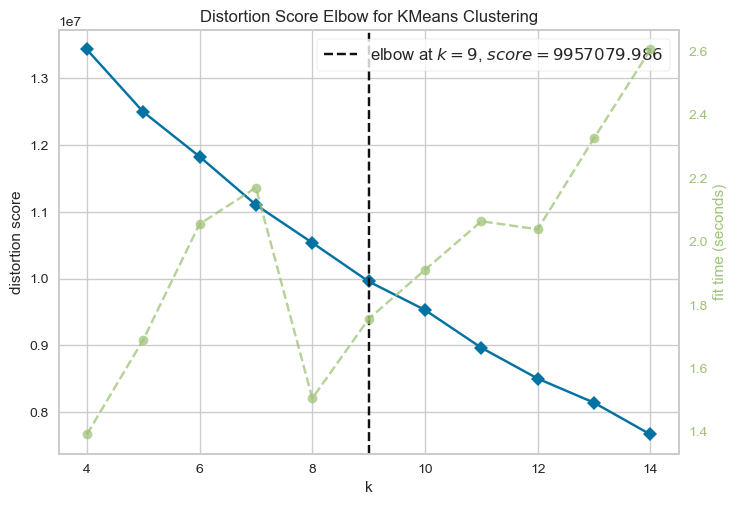

Optimal cluster: 9


In [ ]:
## performing the elbow method to identify the best number of clusters k
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(4,15))
visualizer.fit(df_scaled[most_important_features.values])        
visualizer.show()       
visualizer.elbow_value_ 

print('Optimal cluster:', visualizer.elbow_value_) 

In [ ]:
## Kmeans with 7 clusters
kmeans_best_cluster = KMeans(n_clusters=visualizer.elbow_value_)
kmeans_best_cluster.fit(df_scaled[most_important_features])
#saving the cluster labels
Kmeans_clusters_ImpFeatures = kmeans_best_cluster.labels_

/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: 

### 5.5 Model evaluation with silhouette score / Davis Bouldin Index

<font color='yellow'>**Model evaluation**</font><br>

*Silhouette Coefficient:* This metric gauges the effectiveness of a clustering technique, providing a score within the range of -1 to 1.
A score of 1 indicates well-separated and clearly distinguished clusters.
A score of 0 suggests indifferent clusters, with insignificant distances between them.
A score of -1 signifies misallocation of clusters.

*Davies-Bouldin Index (DBI):* The DBI is computed as the average similarity of each cluster with the cluster most similar to it. A lower average similarity implies better separation between clusters and, consequently, a more favorable clustering outcome.

In [ ]:
from sklearn import metrics
sc = []
dbi = []

#metrics from imporant PC features method
sc.append(metrics.silhouette_score(pca_comps, Kmeans_clusters_PCs, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(pca_comps, Kmeans_clusters_PCs))

#metrics from imporant features from PCA method
sc.append(metrics.silhouette_score(df_scaled[most_important_features], Kmeans_clusters_ImpFeatures, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(df_scaled[most_important_features], Kmeans_clusters_ImpFeatures))

clusteting_methods = ['Kmean_on_PCs', 'Kmean_on_ImpFeatures']

# Creating a pandas dataframe
d = {'silhouette_score': sc, 'DBI': dbi, 'clusteting_methods':clusteting_methods}
df_metrics = pd.DataFrame(d)
df_metrics.set_index('clusteting_methods', inplace = True)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/hiddebrink/anaconda3/envs/AI_methods/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


KeyboardInterrupt: 

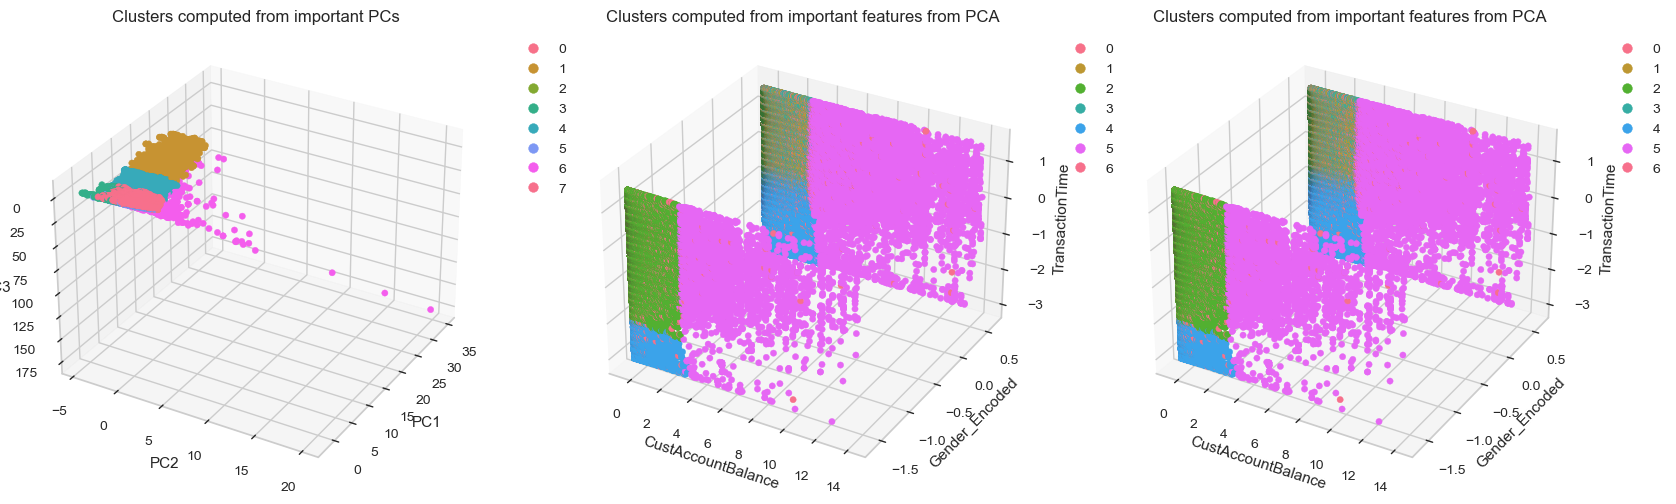

In [ ]:
## Let us visualize how the clusters look on the first 3 PCs and 3 important fearures computed from the two methods
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

fig = plt.figure(figsize=(20, 7.5), dpi=100)

# set up the axes for the first plot
ax = fig.add_subplot(1, 3, 1, projection='3d')
scatter = ax.scatter(pca_comps[:,0],pca_comps[:,1],pca_comps[:,2], c = Kmeans_clusters_PCs, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters computed from important PCs')
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.view_init(-150, -30)


# set up the axes for the second plot
ax = fig.add_subplot(1, 3, 2, projection='3d')
scatter = ax.scatter(df_scaled[most_important_features[0]],df_scaled[most_important_features[1]],df_scaled[most_important_features[2]], 
                        c = Kmeans_clusters_ImpFeatures, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel(most_important_features[0])
ax.set_ylabel(most_important_features[1])
ax.set_zlabel(most_important_features[2])
ax.set_title('Clusters computed from important features from PCA')
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# set up the axes for the 3rd plot
ax = fig.add_subplot(1, 3, 3, projection='3d')
scatter = ax.scatter(df_scaled[most_important_features[0]],df_scaled[most_important_features[1]],df_scaled[most_important_features[2]], 
                        c = Kmeans_clusters_ImpFeatures, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel(most_important_features[0])
ax.set_ylabel(most_important_features[1])
ax.set_zlabel(most_important_features[2])
ax.set_title('Clusters computed from important features from PCA')
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### 4. DBSCAN
Just like K-means we can do DBSCAN 
There are two way to do clustering:
- a) Use the most important PCA components as your feature variables and cluster on that
- b) Select feature based on feature importance from the PCA components and use those selected features to cluster on.

We will do both and calculate the good of metrics: (i) silhouette score, (ii) DBI <br>

Remember DBSCAN has two hyperparameters:
- *Minimum samples (min_samples)*: the minumum number of points required to form a cluster. If not known from domain knowledge, then generally the rule of thumb is: min_samples >= P + 1 or min_samples = 2 * P, with P the number of features
- *Epsilon (eps or ε)*: The value for ε can then be chosen by using a k-distance graph, plotting the distance to the k = min_samples-1 nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an “elbow”. 

##### 4a) DBSCAN on the important Principal Components (PCs)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors 

### 5. HDBSCAN

There are few hyperparameters of the model that can be tuned (see the library documentation), however we will focus on:
- min_cluster_size: set it to the smallest size grouping that you wish to consider a cluster. 
- min_samples: K-th nearest neighbour to a core point, the larger the value of you provide, the more conservative the clustering – more points will be declared as noise, and clusters will be restricted to progressively more dense areas. 

To find the best parameters one needs to do a grid search and minimize a goodness-of-fit metric. If we know a good value of min_samples which will result in a smooth estimated PDF of the X variables, then the min_cluster_size is not as important.

<font color='yellow'>**Model evaluation**</font><br>
We will append values to the lists created for Kmeans and DBSCAN for storing Silhouette score and DBI